<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/8702_TEST_3251-3300.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2388]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [2389]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

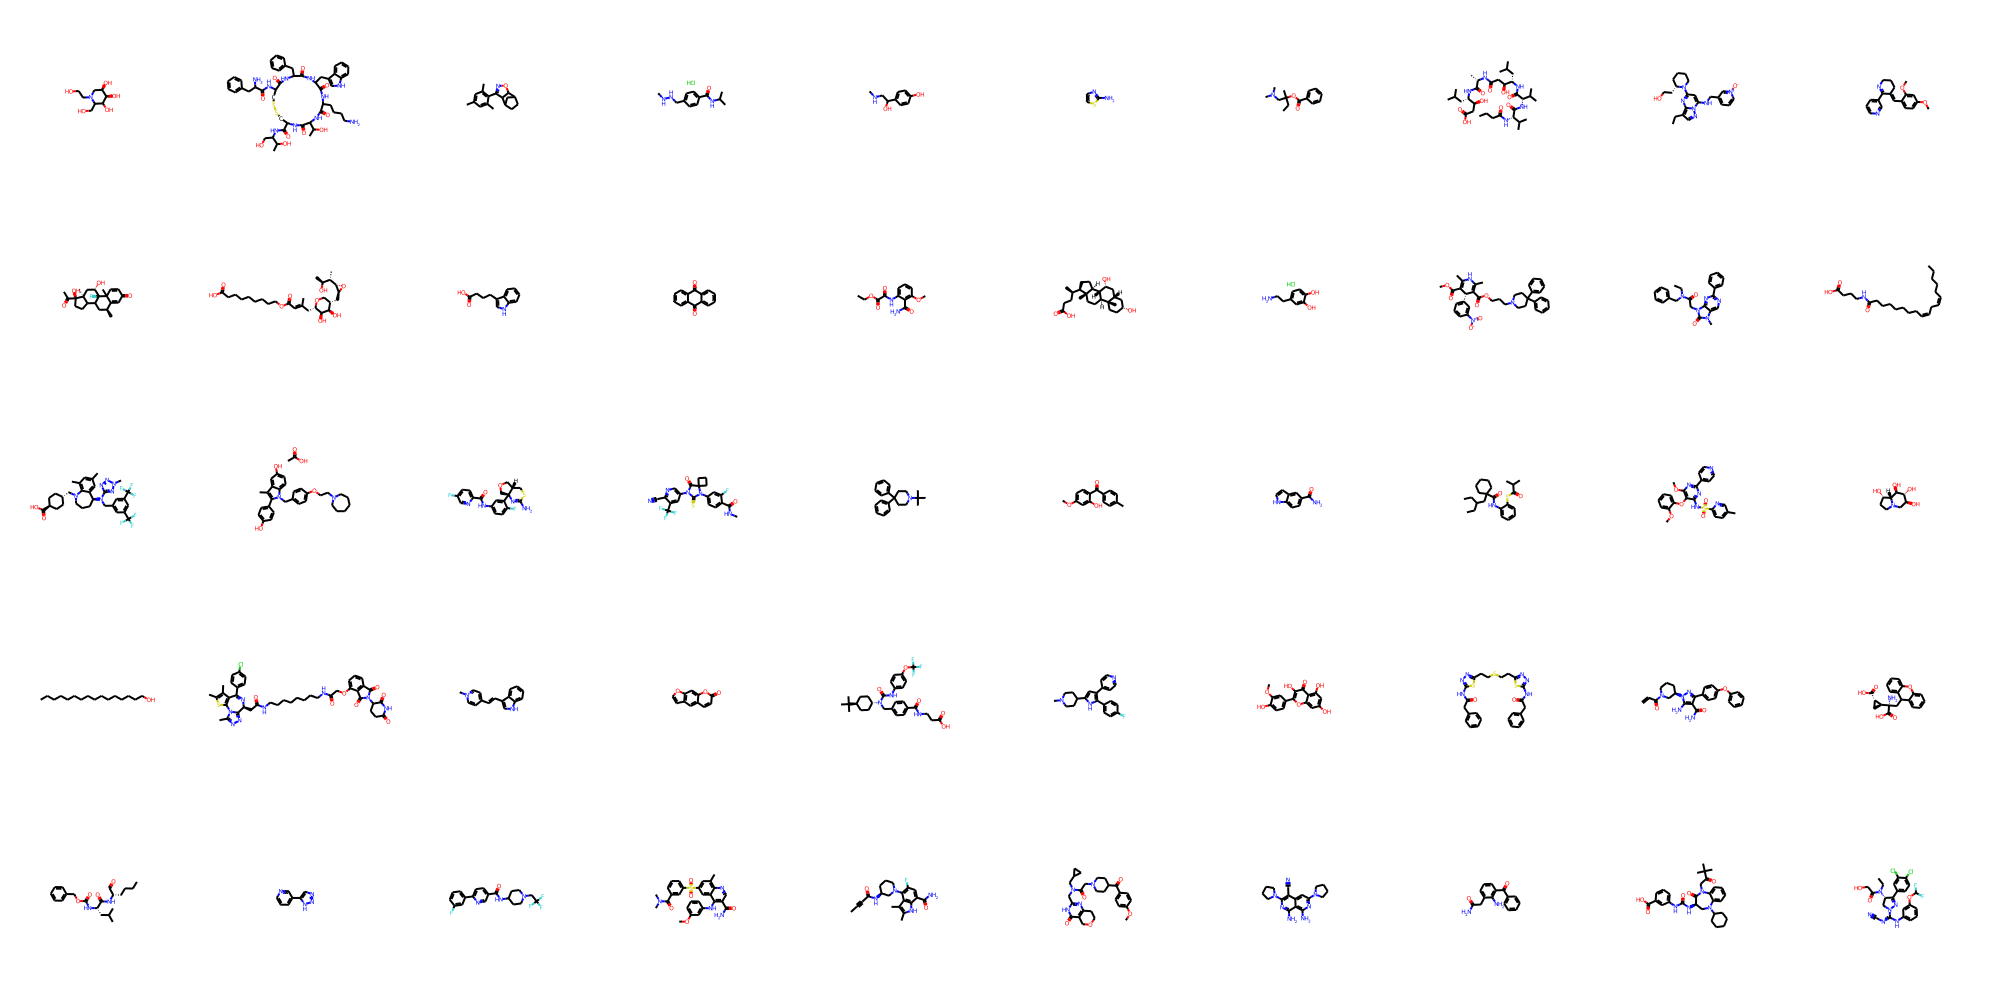

In [2390]:
smiles_list = [

'OCCN1C[C@@H](O)[C@@H](O)C(O)C1CO',
'CC(O)C(CO)NC(=O)C1CSSCC(NC(=O)C(N)Cc2ccccc2)C(=O)NC(Cc2ccccc2)C(=O)NC(Cc2c[nH]c3ccccc23)C(=O)NC(CCCCN)C(=O)NC(C(C)O)C(=O)N1',
'Cc1cc(C)c(C2=NOC3C4CCC(C4)C23)c(C)c1',
'CNNCc1ccc(C(=O)NC(C)C)cc1.Cl',
'CNCC(O)c1ccc(O)cc1',
'Nc1nccs1',
'CCC(C)(CN(C)C)OC(=O)c1ccccc1',
'C(C)CC(=O)N[C@H](C(=O)N[C@H](C(=O)N[C@@H](CC(C)C)[C@@H](O)CC(=O)N[C@@H](C)C(=O)N[C@@H](CC(C)C)[C@@H](O)CC(=O)O)C(C)C)C(C)C',
'CCc1cnn2c(NCc3ccc[n+]([O-])c3)cc(N3CCCC[C@H]3CCO)nc12',
'COc1ccc(/C=C2\CCCN=C2c2cccnc2)c(OC)c1',
'CC(=O)[C@@]1(O)CCC2C3C[C@H](C)C4=CC(=O)C=CC4(C)[C@@]3(F)[C@@H](O)C[C@@]21C',
'C/C(=C\C(=O)OCCCCCCCCC(=O)O)C[C@@H]1OC[C@H](C[C@@H]2O[C@H]2[C@@H](C)[C@H](C)O)[C@@H](O)[C@H]1O',
'O=C(O)CCCc1c[nH]c2ccccc12',
'O=C1c2ccccc2C(=O)c2ccccc21',
'CCOC(=O)C(=O)Nc1cccc(OC)c1C(N)=O',
'C[C@H](CCC(=O)O)[C@H]1CC[C@H]2[C@H]3[C@H](CC[C@@]21C)[C@@]1(C)CC[C@@H](O)C[C@H]1C[C@H]3O',
'Cl.NCCc1ccc(O)c(O)c1',
'COC(=O)C1=C(C)NC(C)=C(C(=O)OCCCN2CCC(c3ccccc3)(c3ccccc3)CC2)[C@@H]1c1cccc([N+](=O)[O-])c1',
'CCN(Cc1ccccc1)C(=O)Cn1c(=O)n(C)c2cnc(-c3ccccc3)nc21',
'CCCCC/C=C\C/C=C\CCCCCCCC(=O)NCCCC(=O)O',
'Cc1cc(C)c2c(c1)[C@@H](N(Cc1cc(C(F)(F)F)cc(C(F)(F)F)c1)c1nnn(C)n1)CCCN2C[C@H]1CC[C@H](C(=O)O)CC1',
'CC(=O)O.Cc1c(-c2ccc(O)cc2)n(Cc2ccc(OCCN3CCCCCC3)cc2)c2ccc(O)cc12',
'NC1=N[C@@]2(c3cc(NC(=O)c4ccc(F)cn4)ccc3F)COC[C@@H]2CS1',
'CNC(=O)c1ccc(N2C(=S)N(c3cnc(C#N)c(C(F)(F)F)c3)C(=O)C23CCC3)cc1F',
'CC(C)(C)N1CCC(c2ccccc2)(c2ccccc2)CC1',
'COc1ccc(C(=O)c2ccc(C)cc2)c(O)c1',
'NC(=O)c1ccc2[nH]ccc2c1',
'CCC(CC)CC1(C(=O)Nc2ccccc2SC(=O)C(C)C)CCCCC1',
'COc1ccccc1Oc1c(NS(=O)(=O)c2ccc(C)cn2)nc(-c2ccncc2)nc1OC',
'O[C@H]1CN2CC[C@H](O)[C@@H]2[C@@H](O)[C@@H]1O',
'CCCCCCCCCCCCCCCCO',
'Cc1sc2c(c1C)C(c1ccc(Cl)cc1)=N[C@@H](CC(=O)NCCCCCCCCNC(=O)COc1cccc3c1C(=O)N(C1CCC(=O)NC1=O)C3=O)c1nnc(C)n1-2',
'C[n+]1ccc(/C=C/c2c[nH]c3ccccc23)cc1',
'O=c1ccc2cc3ccoc3cc2o1',
'CC(C)(C)[C@H]1CC[C@H](N(Cc2ccc(C(=O)NCCC(=O)O)cc2)C(=O)Nc2ccc(OC(F)(F)F)cc2)CC1',
'CN1CCC(c2cc(-c3ccncc3)c(-c3ccc(F)cc3)[nH]2)CC1',
'COc1cc(-c2oc3cc(O)cc(O)c3c(=O)c2O)ccc1O',
'O=C(Cc1ccccc1)Nc1nnc(CCSCCc2nnc(NC(=O)Cc3ccccc3)s2)s1',
'C=CC(=O)N1CCC[C@@H](n2nc(-c3ccc(Oc4ccccc4)cc3)c(C(N)=O)c2N)C1',
'N[C@](CC1c2ccccc2Oc2ccccc21)(C(=O)O)[C@H]1C[C@@H]1C(=O)O',
'CCCC[C@@H](C=O)NC(=O)[C@H](CC(C)C)NC(=O)OCc1ccccc1',
'c1cncc(-c2cnn[nH]2)c1',
'O=C(NC1CCN(CC(F)(F)F)CC1)c1ccc(-c2cccc(F)c2)nc1',
'COc1cccc(Nc2c(C(N)=O)cnc3c(C)cc(S(=O)(=O)c4cccc(C(=O)N(C)C)c4)cc23)c1',
'CC#CC(=O)N[C@H]1CCCN(c2c(F)cc(C(N)=O)c3[nH]c(C)c(C)c23)C1',
'COc1ccc(C(=O)C2CCN(CC(=O)N(Cc3nc4c(c(=O)[nH]3)COCC4)CC3CC3)CC2)cc1',
'N#Cc1c(N2CCCC2)nc(N)c2c(N)nc(N3CCCC3)cc12',
'NC(=O)Cc1cccc(C(=O)c2ccccc2)c1N',
'CC(C)(C)C(=O)CN1C(=O)[C@H](NC(=O)Nc2cccc(C(=O)O)c2)CN(C2CCCCC2)c2ccccc21',
'CCN(C(=O)CO)[C@H]1CN(/C(=N\C#N)Nc2cccc(OC(F)F)c2)N=C1c1ccc(Cl)c(Cl)c1',

               
]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



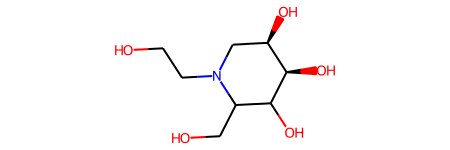

In [2391]:
M1 = mol_list [0]
M1

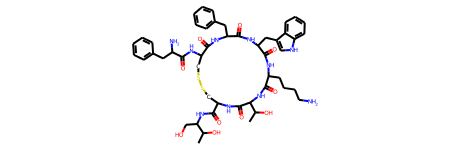

In [2392]:
M2 = mol_list [1]
M2

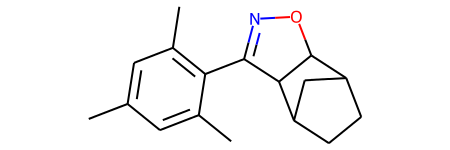

In [2393]:
M3 = mol_list [2]
M3

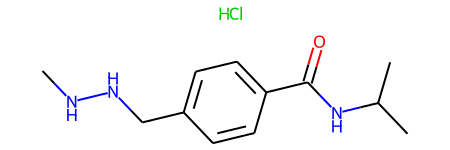

In [2394]:
M4 = mol_list [3]
M4

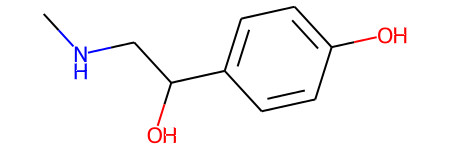

In [2395]:
M5 = mol_list [4]
M5

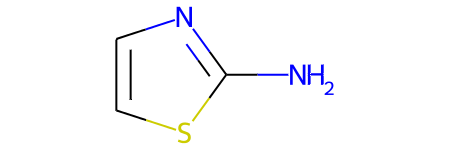

In [2396]:
M6 = mol_list [5]
M6

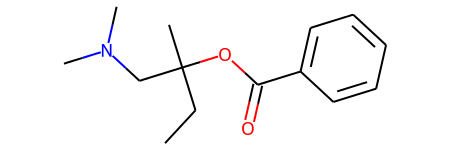

In [2397]:
M7 = mol_list [6]
M7

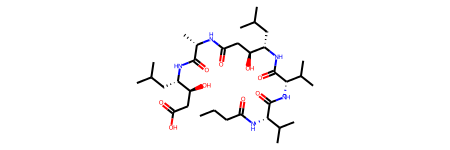

In [2398]:
M8 = mol_list [7]
M8

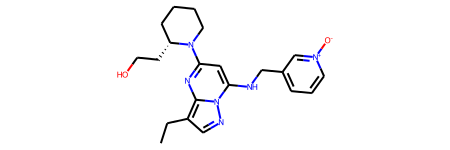

In [2399]:
M9 = mol_list [8]
M9

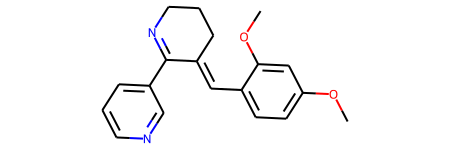

In [2400]:
M10 = mol_list [9]
M10

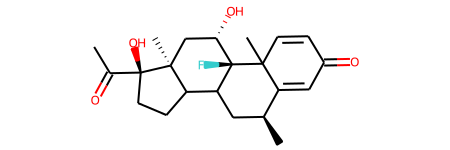

In [2401]:
M11 = mol_list [10]
M11

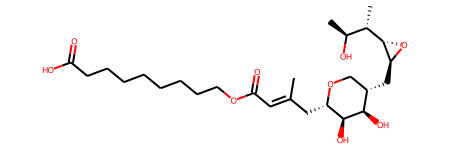

In [2402]:
M12 = mol_list [11]
M12

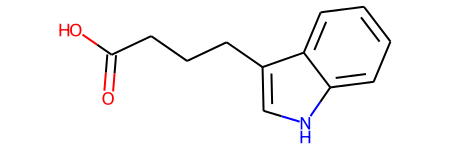

In [2403]:
M13 = mol_list [12]
M13

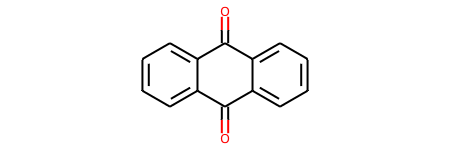

In [2404]:
M14 = mol_list [13]
M14

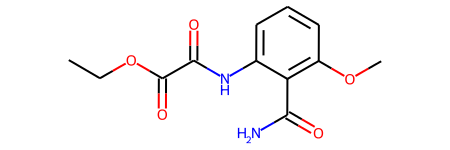

In [2405]:
M15 = mol_list [14]
M15

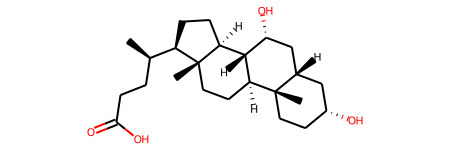

In [2406]:
M16 = mol_list [15]
M16

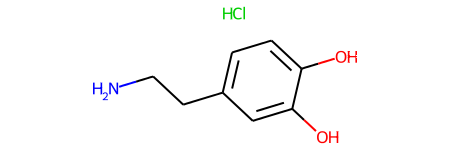

In [2407]:
M17 = mol_list [16]
M17

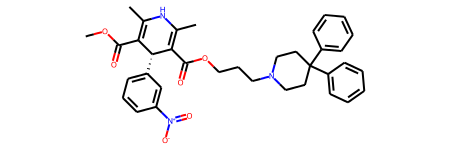

In [2408]:
M18 = mol_list [17]
M18

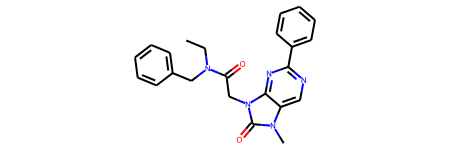

In [2409]:
M19 = mol_list [18]
M19

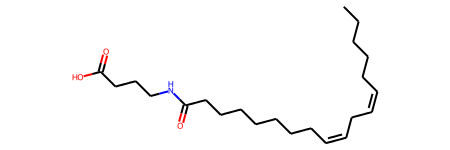

In [2410]:
M20 = mol_list [19]
M20

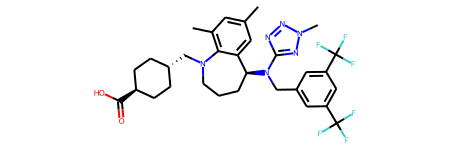

In [2411]:
M21 = mol_list [20]
M21

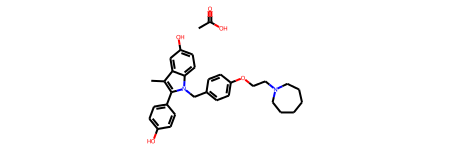

In [2412]:
M22 = mol_list [21]
M22

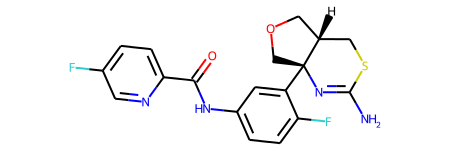

In [2413]:
M23 = mol_list [22]
M23

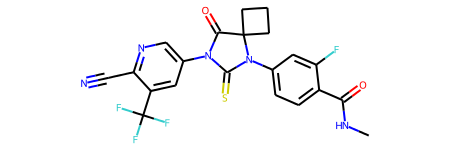

In [2414]:
M24 = mol_list [23]
M24

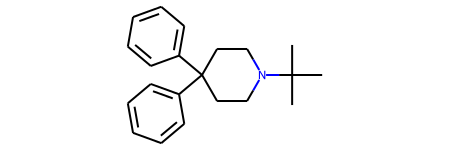

In [2415]:
M25 = mol_list [24]
M25

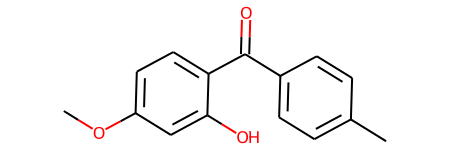

In [2416]:
M26 = mol_list [25]
M26

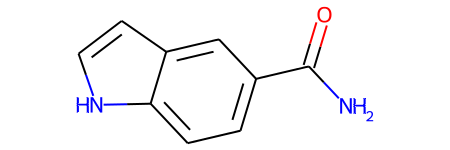

In [2417]:
M27 = mol_list [26]
M27

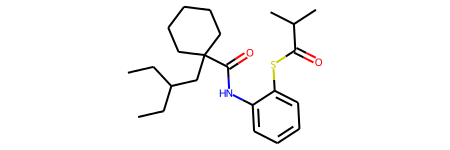

In [2418]:
M28 = mol_list [27]
M28

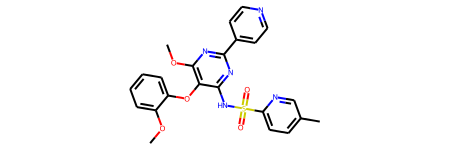

In [2419]:
M29 = mol_list [28]
M29

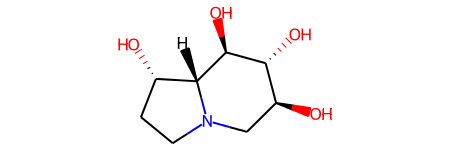

In [2420]:
M30 = mol_list [29]
M30

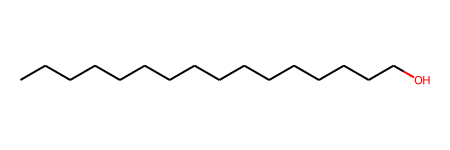

In [2421]:
M31 = mol_list [30]
M31

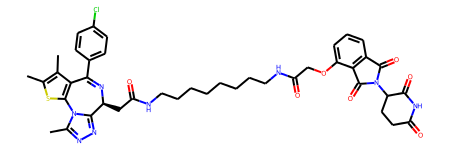

In [2422]:
M32 = mol_list [31]
M32

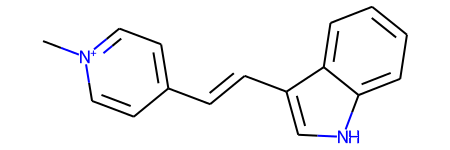

In [2423]:
M33 = mol_list [32]
M33

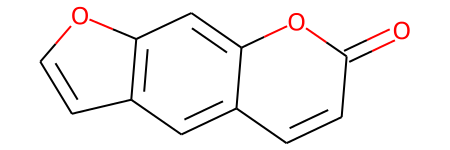

In [2424]:
M34 = mol_list [33]
M34

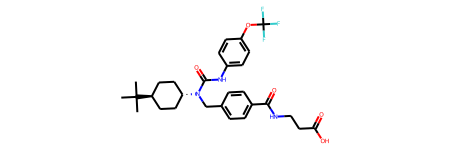

In [2425]:
M35 = mol_list [34]
M35

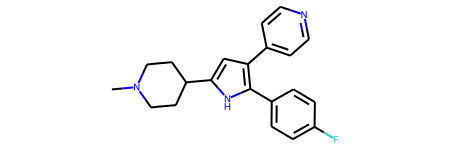

In [2426]:
M36 = mol_list [35]
M36

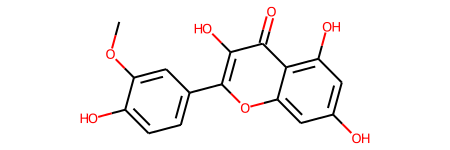

In [2427]:
M37= mol_list [36]
M37

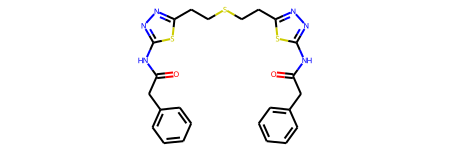

In [2428]:
M38= mol_list [37]
M38

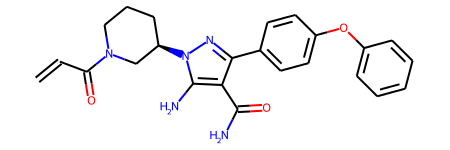

In [2429]:
M39= mol_list [38]
M39

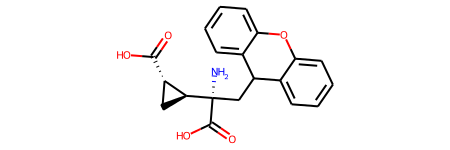

In [2430]:
M40= mol_list [39]
M40

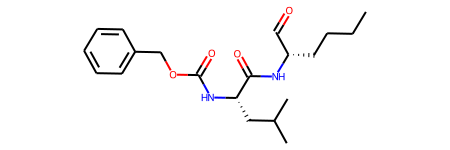

In [2431]:
M41= mol_list [40]
M41

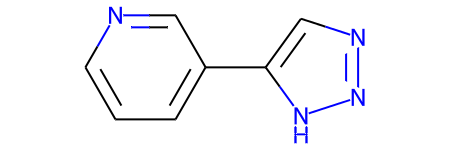

In [2432]:
M42= mol_list [41]
M42

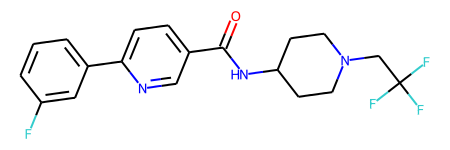

In [2433]:
M43= mol_list [42]
M43

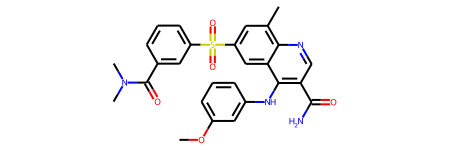

In [2434]:
M44= mol_list [43]
M44

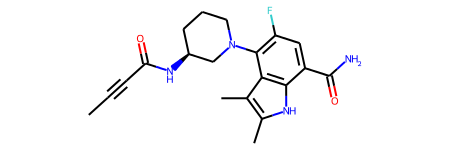

In [2435]:
M45= mol_list [44]
M45

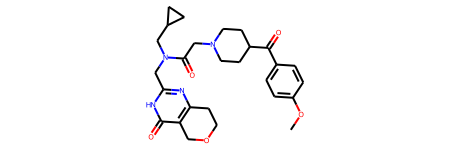

In [2436]:
M46= mol_list [45]
M46

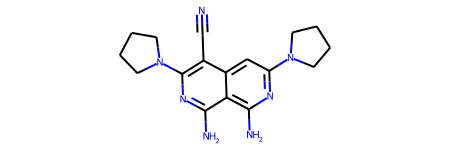

In [2437]:
M47= mol_list [46]
M47

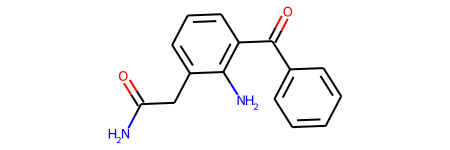

In [2438]:
M48= mol_list [47]
M48

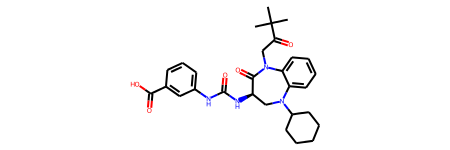

In [2439]:
M49= mol_list [48]
M49

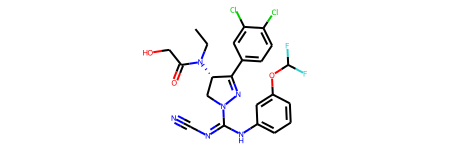

In [2440]:
M50= mol_list [49]
M50

In [2441]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[80,
 121,
 152,
 189,
 205,
 222,
 233,
 463,
 473,
 492,
 695,
 739,
 807,
 823,
 849,
 899,
 912,
 926,
 935,
 993,
 997,
 998,
 1012,
 1019]

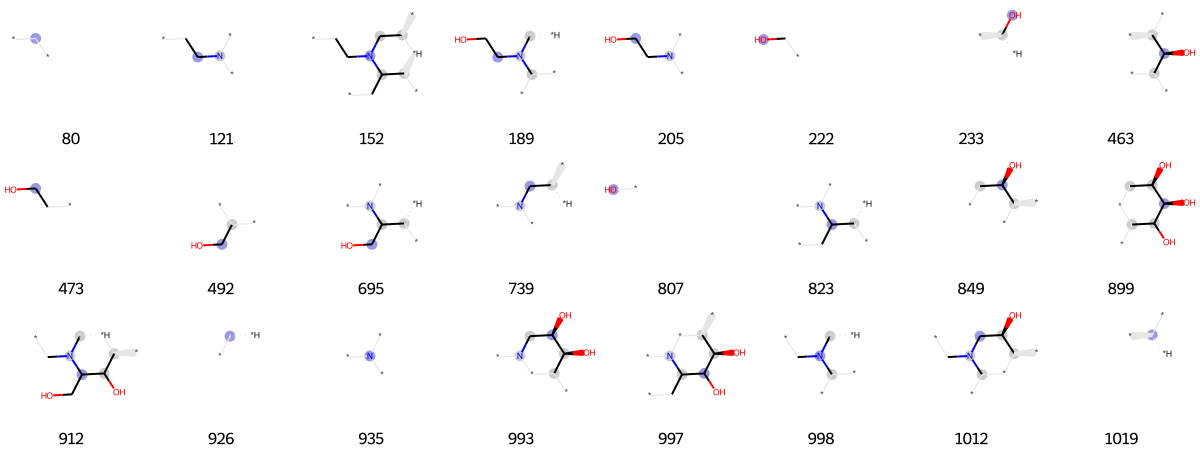

In [2442]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [2443]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp2, fp_arr)
np.nonzero(fp_arr)
list(fp2.GetOnBits())

[1,
 10,
 33,
 42,
 58,
 64,
 79,
 80,
 90,
 115,
 117,
 119,
 128,
 147,
 160,
 175,
 220,
 222,
 227,
 282,
 283,
 301,
 314,
 318,
 325,
 328,
 333,
 334,
 355,
 356,
 362,
 364,
 375,
 387,
 389,
 402,
 432,
 435,
 457,
 458,
 474,
 478,
 482,
 492,
 493,
 509,
 519,
 549,
 573,
 583,
 608,
 635,
 650,
 665,
 669,
 675,
 687,
 689,
 715,
 726,
 730,
 759,
 786,
 804,
 806,
 807,
 812,
 816,
 820,
 825,
 828,
 832,
 849,
 855,
 857,
 887,
 893,
 899,
 913,
 917,
 926,
 957,
 966,
 976,
 981,
 1006,
 1017,
 1019]

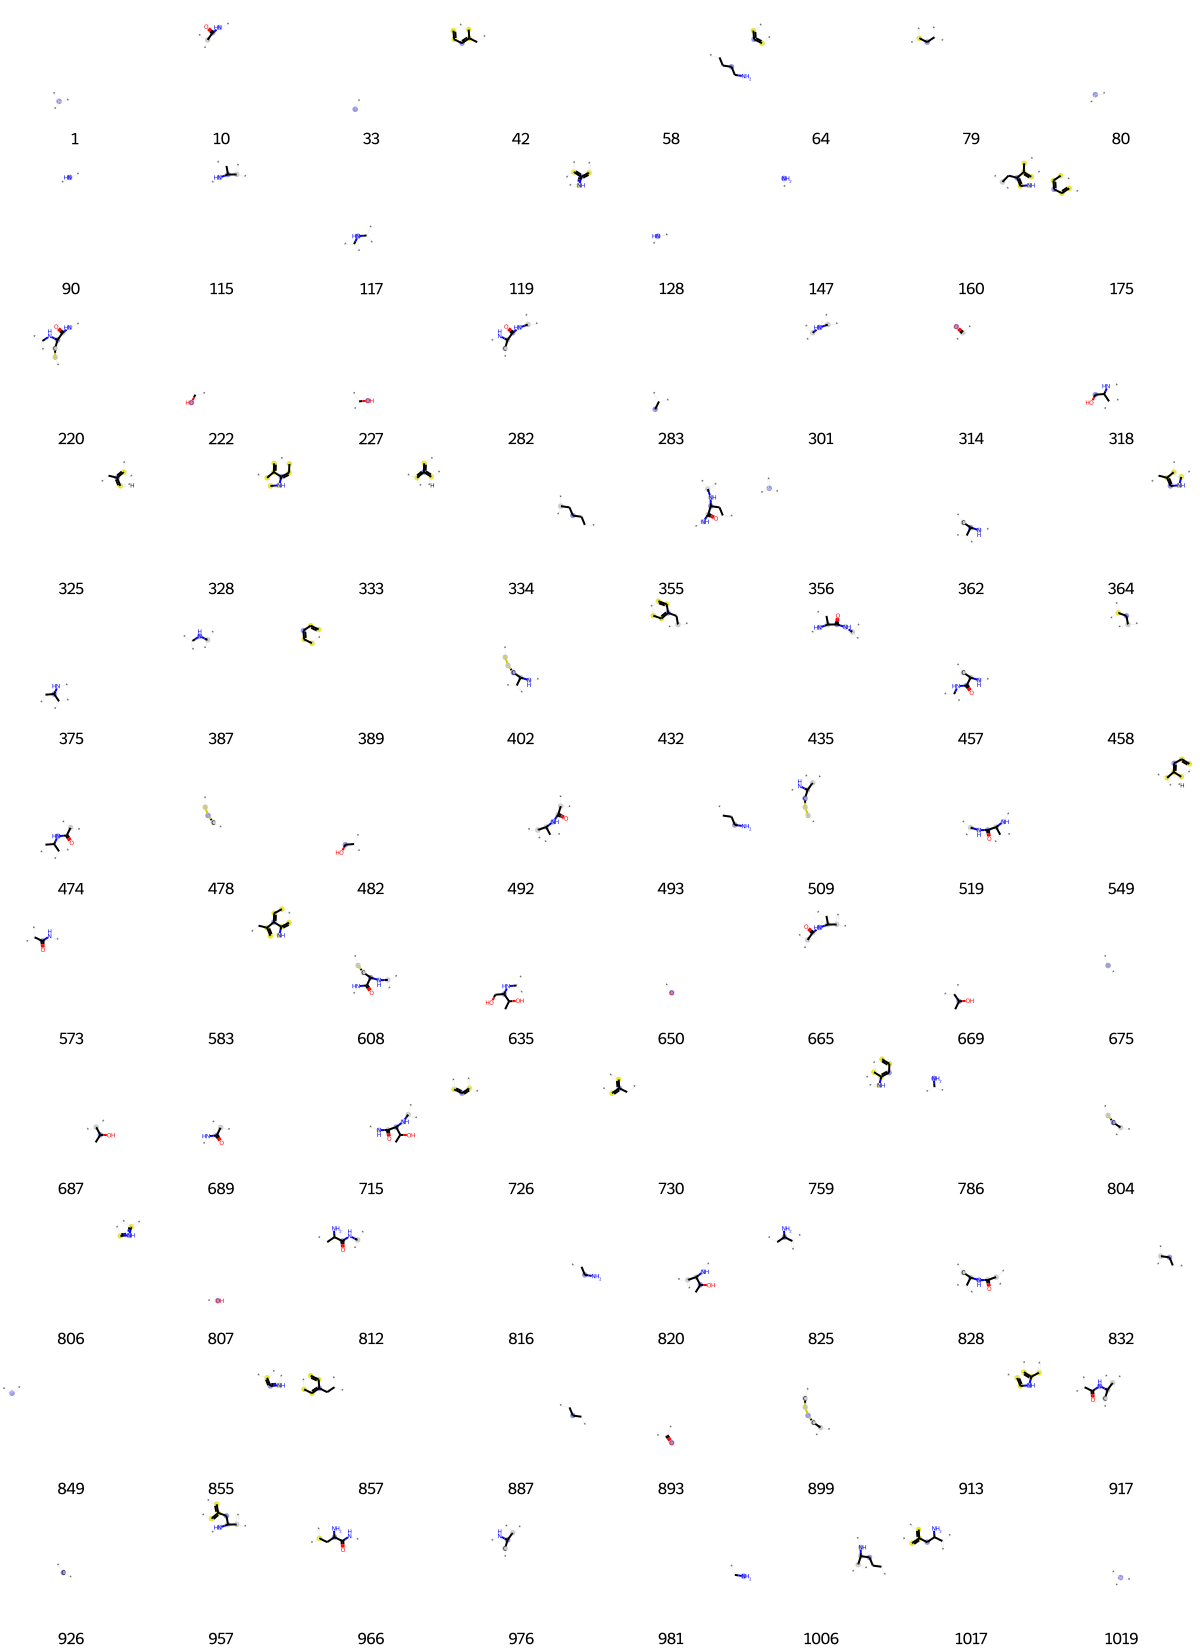

In [2444]:
prints = [(M2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp2.GetOnBits ()])

In [2445]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[30,
 33,
 35,
 134,
 166,
 204,
 221,
 268,
 301,
 356,
 367,
 378,
 433,
 451,
 516,
 563,
 576,
 585,
 588,
 656,
 669,
 698,
 723,
 755,
 799,
 849,
 875,
 925,
 926,
 929,
 983,
 1019,
 1023]

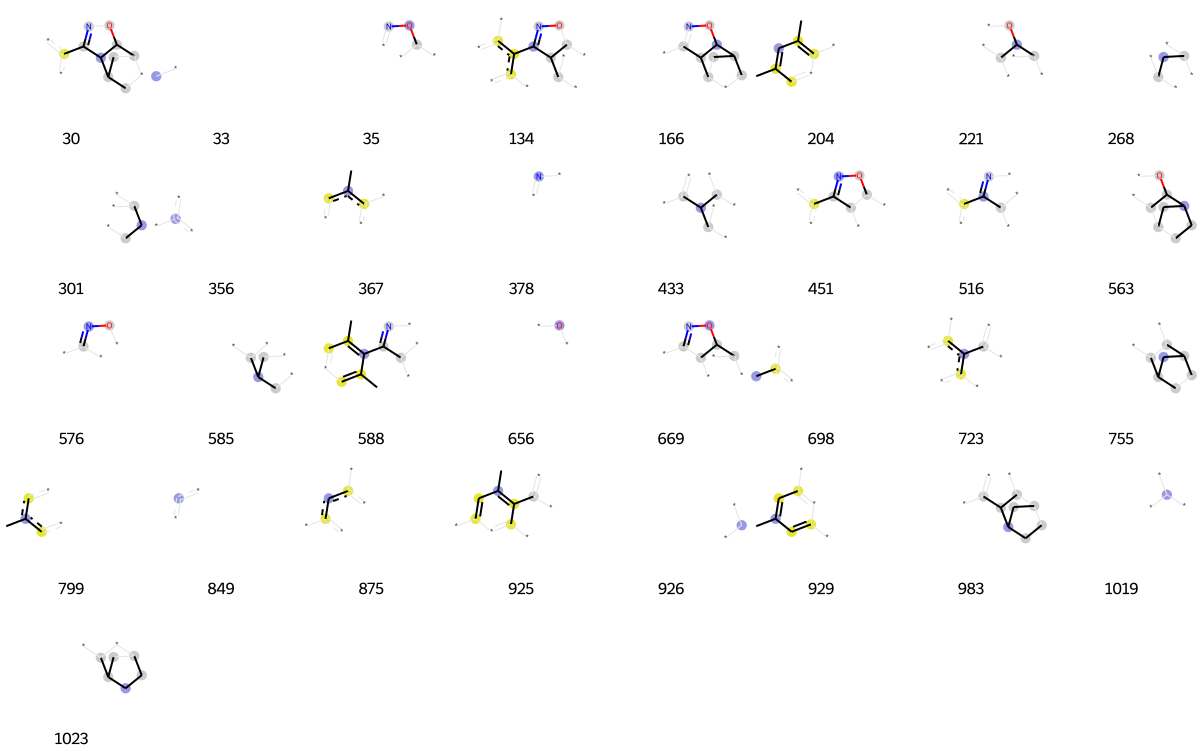

In [2446]:
prints = [(M3, x, bi) for x in fp3.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp3.GetOnBits ()])

In [2447]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[1,
 4,
 33,
 78,
 80,
 117,
 128,
 227,
 255,
 283,
 302,
 310,
 356,
 361,
 380,
 406,
 464,
 486,
 495,
 514,
 638,
 641,
 650,
 673,
 695,
 726,
 730,
 807,
 849,
 893,
 963]

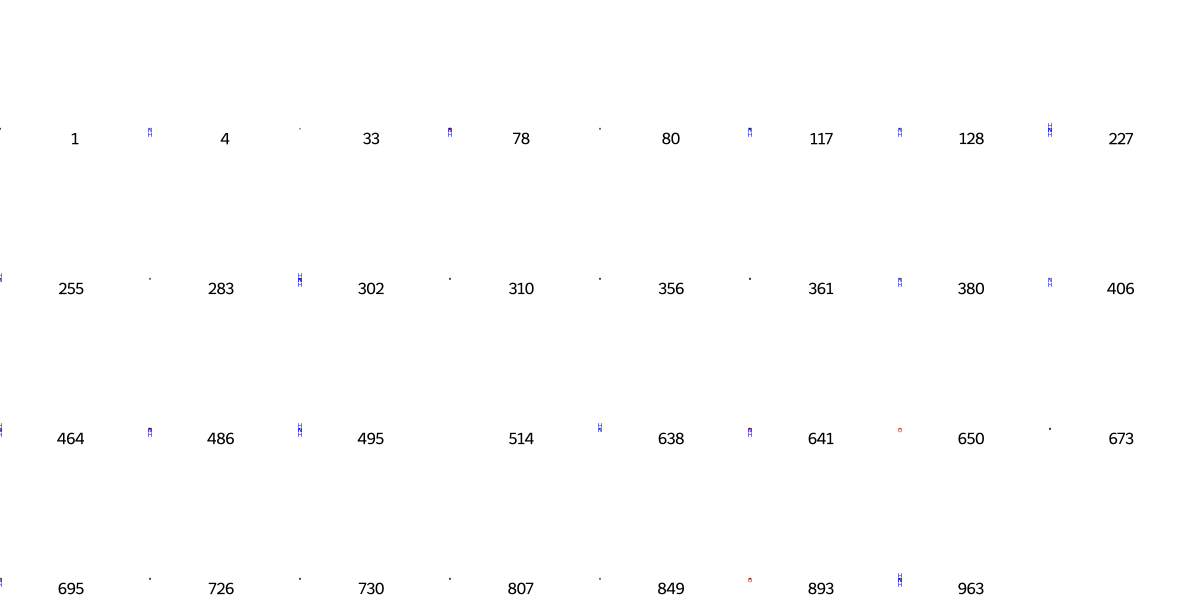

In [2448]:
prints = [(M4, x, bi) for x in fp4.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp4.GetOnBits ()])

In [2449]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[1,
 33,
 80,
 128,
 227,
 263,
 289,
 338,
 341,
 343,
 356,
 406,
 578,
 606,
 632,
 726,
 745,
 754,
 807,
 829,
 844,
 849,
 971]

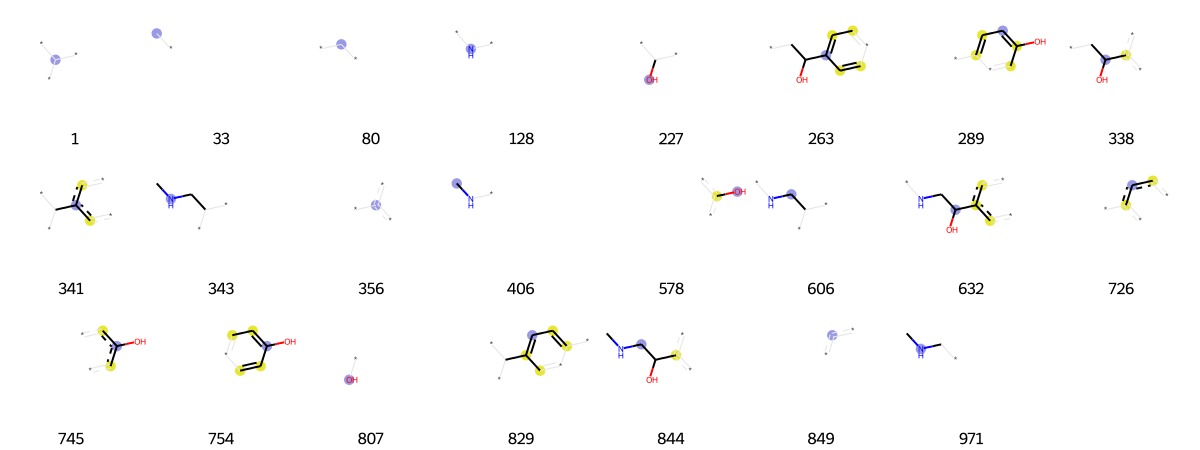

In [2450]:
prints = [(M5, x, bi) for x in fp5.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp5.GetOnBits ()])

In [2451]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[14, 147, 240, 320, 356, 378, 428, 433, 543, 554, 675, 842, 849, 902, 905]

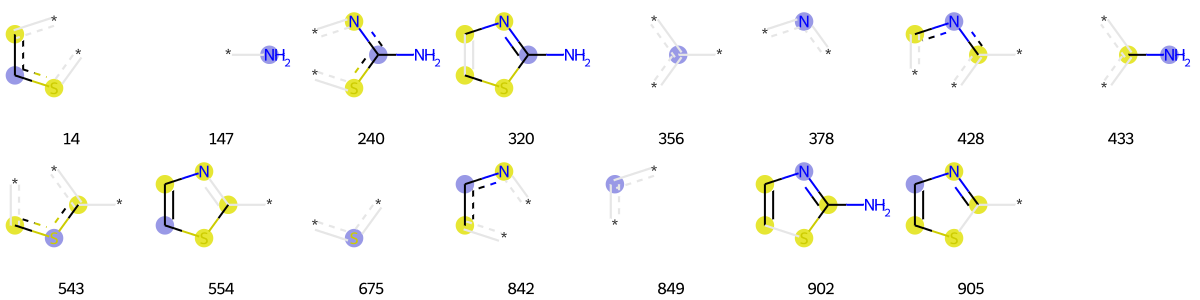

In [2452]:
prints = [(M6, x, bi) for x in fp6.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp6.GetOnBits ()])

In [2453]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[12,
 33,
 64,
 80,
 114,
 139,
 145,
 156,
 162,
 175,
 226,
 231,
 283,
 294,
 295,
 356,
 361,
 389,
 392,
 402,
 441,
 606,
 650,
 652,
 695,
 726,
 757,
 807,
 849,
 881,
 893,
 961]

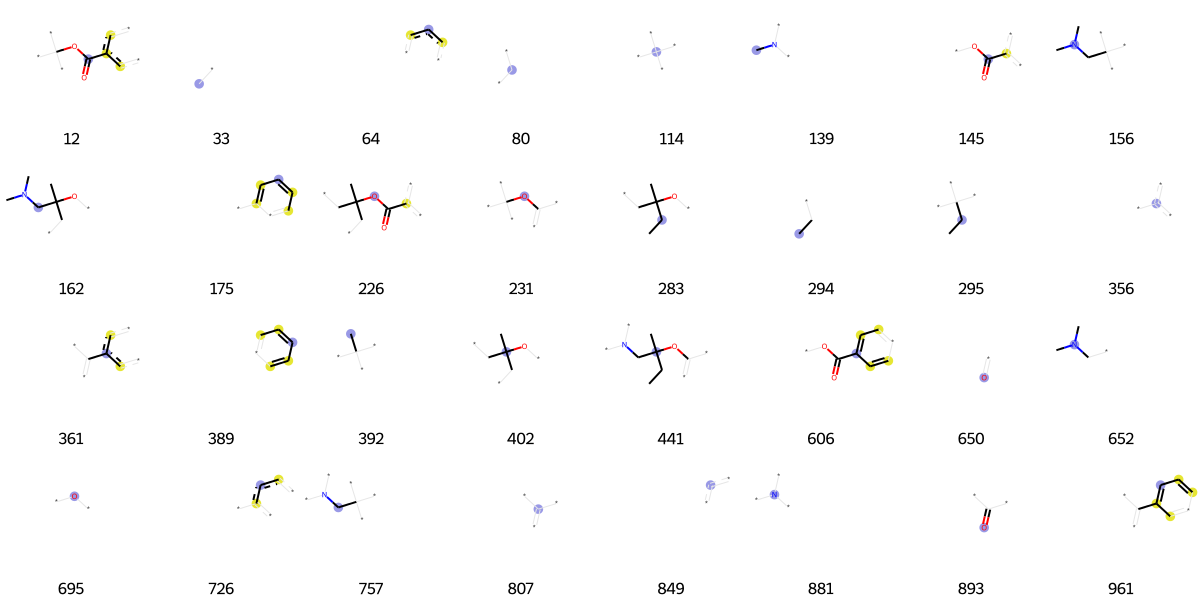

In [2454]:
prints = [(M7, x, bi) for x in fp7.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp7.GetOnBits ()])

In [2455]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[1,
 33,
 41,
 80,
 94,
 115,
 117,
 128,
 143,
 182,
 227,
 266,
 283,
 294,
 333,
 353,
 375,
 389,
 436,
 493,
 506,
 507,
 539,
 540,
 573,
 598,
 599,
 650,
 680,
 713,
 749,
 759,
 794,
 805,
 807,
 823,
 838,
 888,
 893,
 895,
 899,
 989,
 1015]

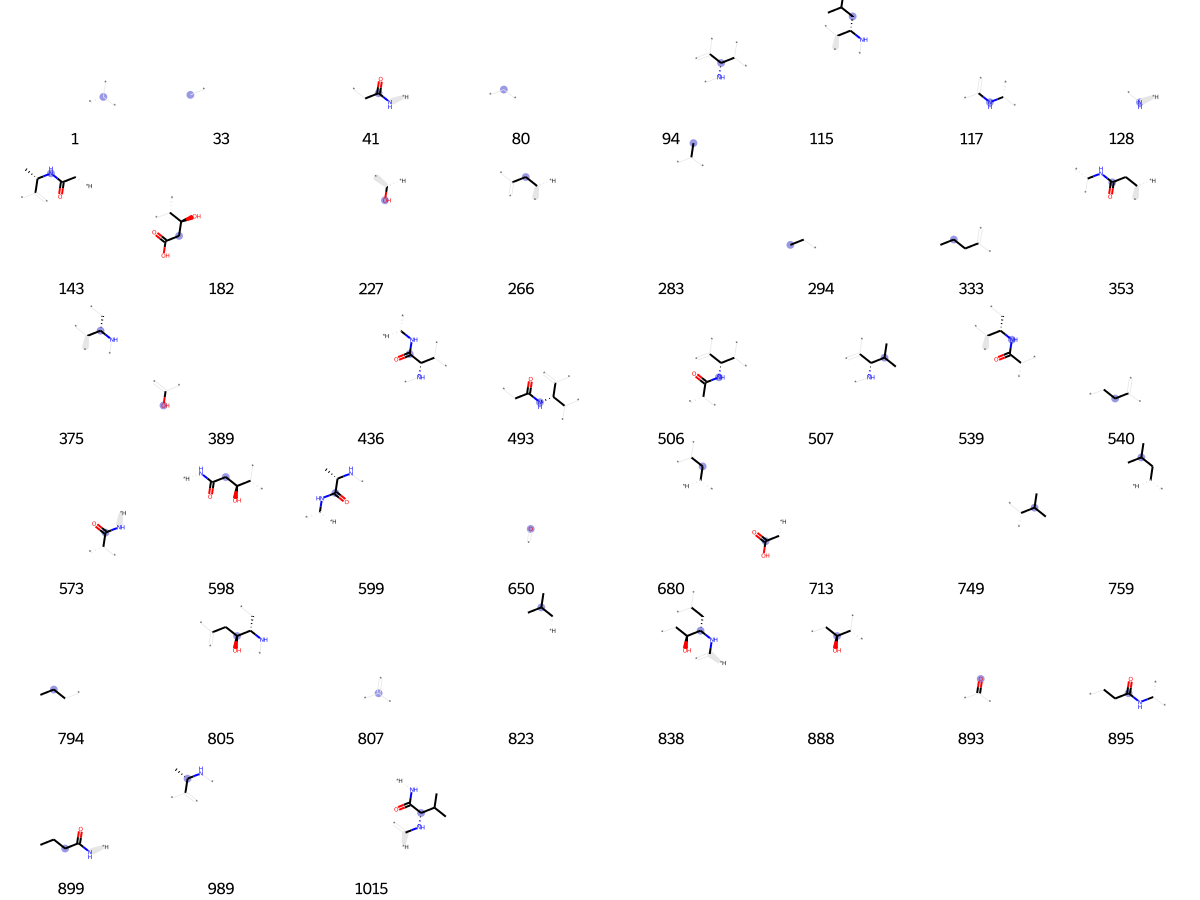

In [2456]:
prints = [(M8, x, bi) for x in fp8.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp8.GetOnBits ()])


In [2457]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[4,
 26,
 33,
 38,
 39,
 42,
 43,
 64,
 80,
 128,
 191,
 217,
 222,
 255,
 290,
 294,
 301,
 314,
 325,
 343,
 350,
 356,
 363,
 378,
 383,
 392,
 412,
 456,
 463,
 473,
 511,
 527,
 528,
 559,
 565,
 584,
 599,
 634,
 650,
 662,
 672,
 684,
 715,
 726,
 730,
 755,
 775,
 791,
 807,
 812,
 831,
 832,
 849,
 875,
 890,
 914,
 926,
 935,
 950,
 954,
 960,
 974,
 980,
 1003,
 1019]

In [2458]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[4,
 19,
 33,
 64,
 67,
 73,
 124,
 136,
 224,
 249,
 257,
 281,
 313,
 322,
 332,
 356,
 378,
 395,
 437,
 459,
 493,
 511,
 512,
 562,
 579,
 635,
 694,
 695,
 714,
 718,
 724,
 726,
 736,
 747,
 781,
 841,
 842,
 849,
 875,
 881,
 917,
 919,
 926,
 946,
 948,
 961,
 1018]

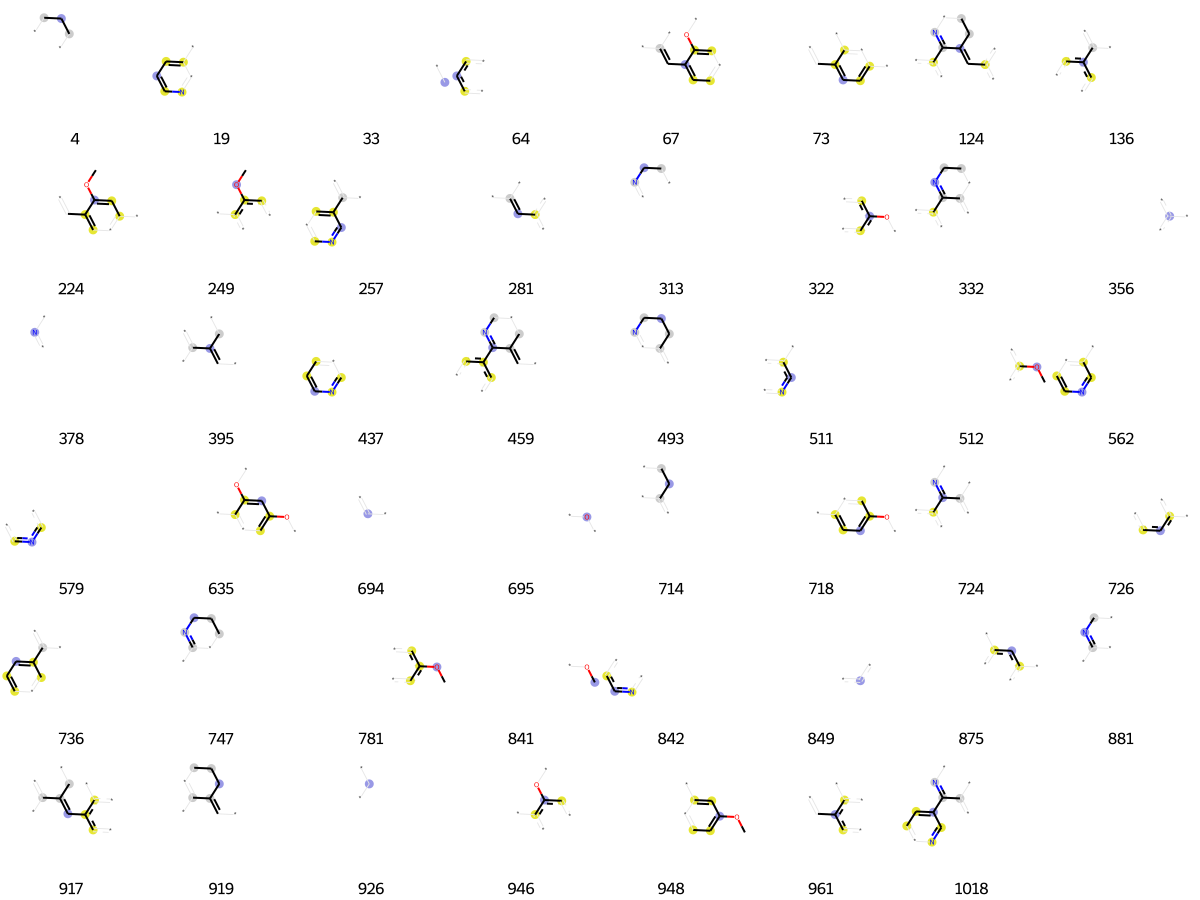

In [2459]:
prints = [(M10, x, bi) for x in fp10.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp10.GetOnBits ()])

In [2460]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[33,
 36,
 84,
 130,
 138,
 170,
 233,
 250,
 251,
 268,
 285,
 301,
 314,
 315,
 356,
 412,
 426,
 460,
 519,
 529,
 547,
 580,
 650,
 655,
 679,
 687,
 738,
 748,
 750,
 760,
 767,
 781,
 787,
 790,
 798,
 804,
 807,
 835,
 836,
 849,
 872,
 893,
 904,
 926,
 951,
 967,
 972,
 991,
 997,
 1017,
 1019]

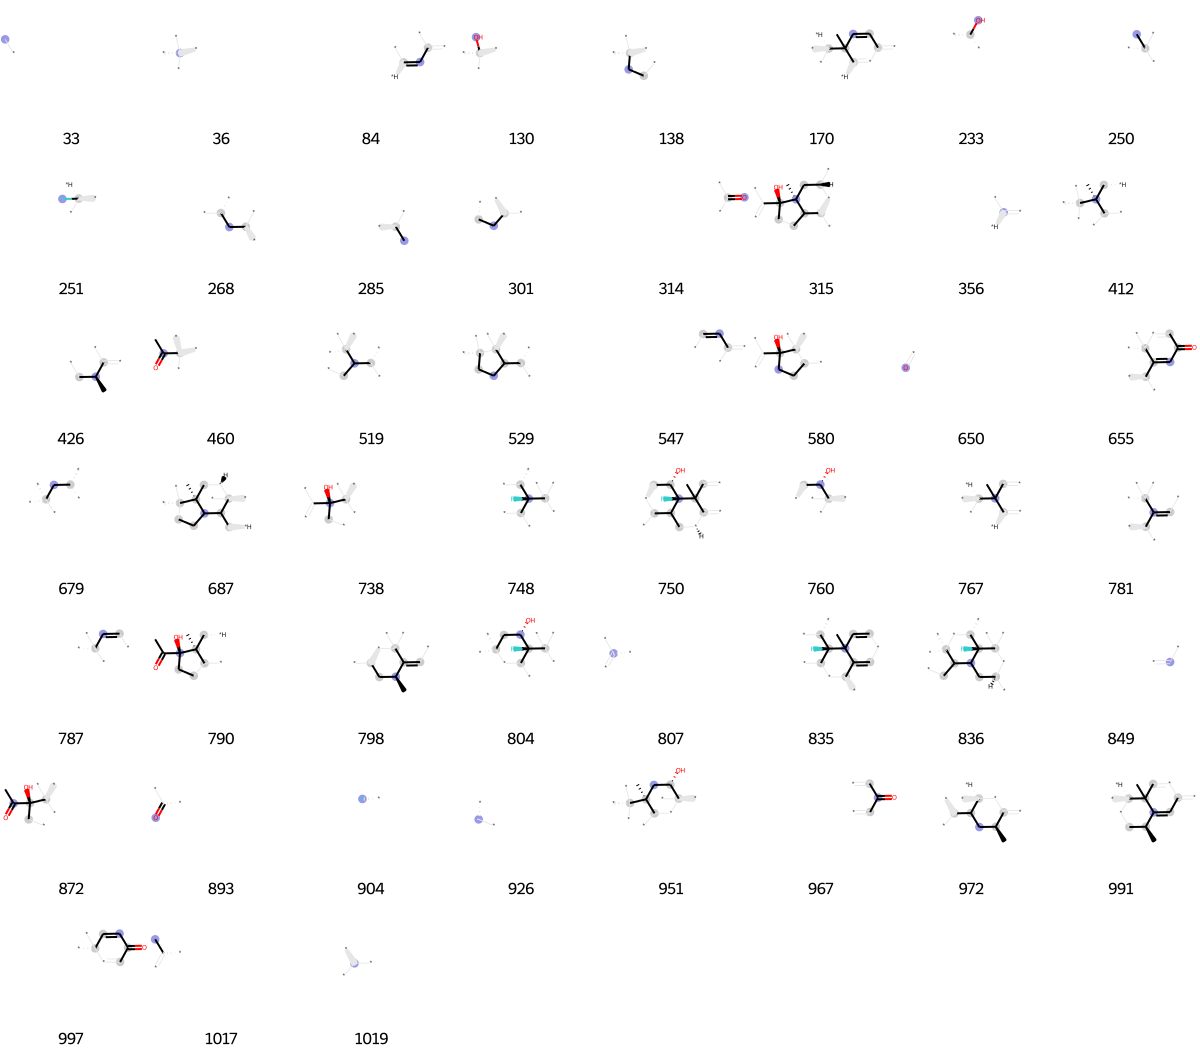

In [2461]:
prints = [(M11, x, bi) for x in fp11.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp11.GetOnBits ()])

In [2462]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[1,
 13,
 31,
 33,
 45,
 49,
 80,
 86,
 96,
 119,
 147,
 225,
 226,
 227,
 233,
 243,
 263,
 283,
 311,
 374,
 389,
 421,
 435,
 436,
 447,
 463,
 540,
 579,
 583,
 610,
 650,
 656,
 669,
 676,
 690,
 694,
 695,
 710,
 713,
 796,
 797,
 802,
 804,
 807,
 820,
 828,
 887,
 893,
 897,
 899,
 926,
 930,
 931,
 976,
 1004,
 1017,
 1019,
 1020]

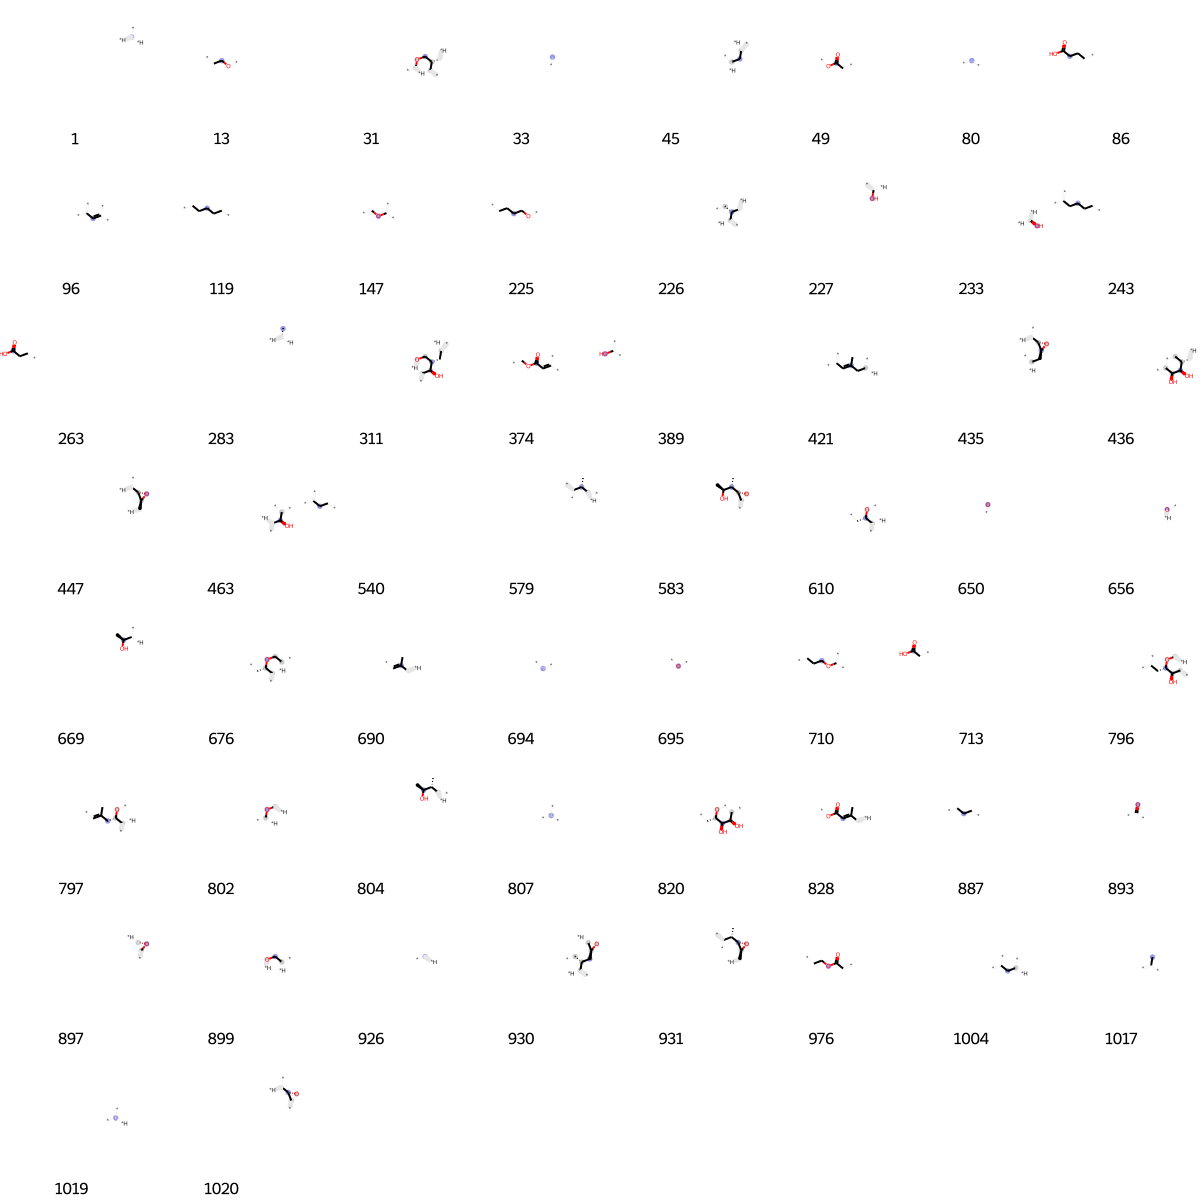

In [2463]:
prints = [(M12, x, bi) for x in fp12.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp12.GetOnBits ()])

In [2464]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[64,
 80,
 86,
 90,
 119,
 175,
 219,
 263,
 325,
 328,
 333,
 356,
 364,
 389,
 476,
 503,
 540,
 549,
 583,
 650,
 713,
 717,
 726,
 759,
 806,
 807,
 849,
 855,
 887,
 893,
 913]

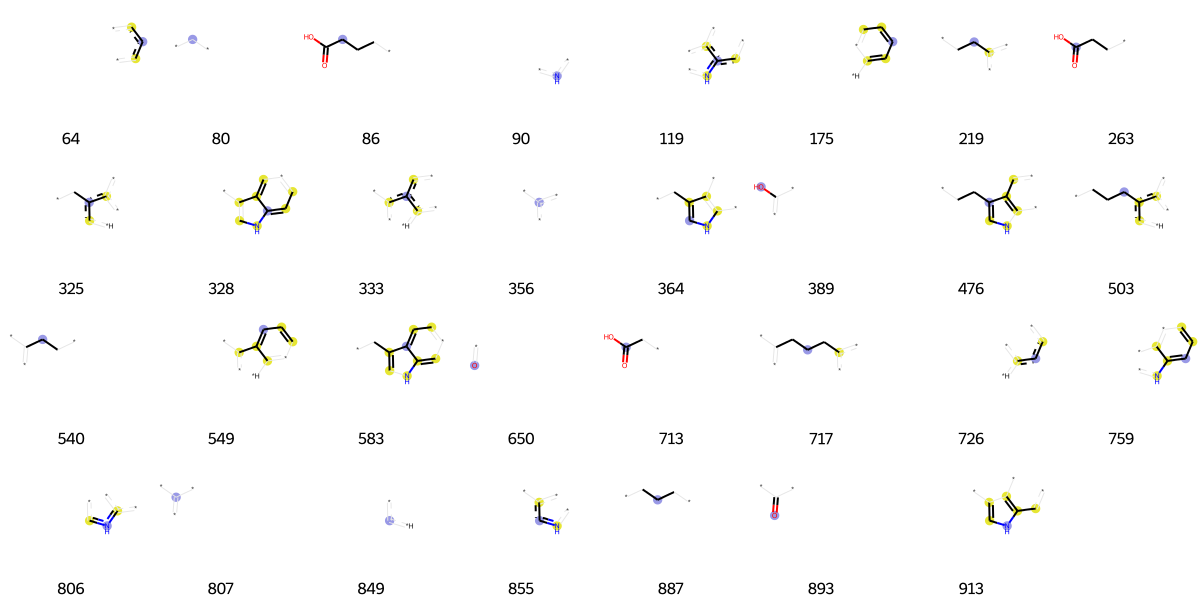

In [2465]:
prints = [(M13, x, bi) for x in fp13.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp13.GetOnBits ()])

In [2466]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[1, 64, 175, 314, 352, 356, 452, 650, 726, 849, 901, 984]

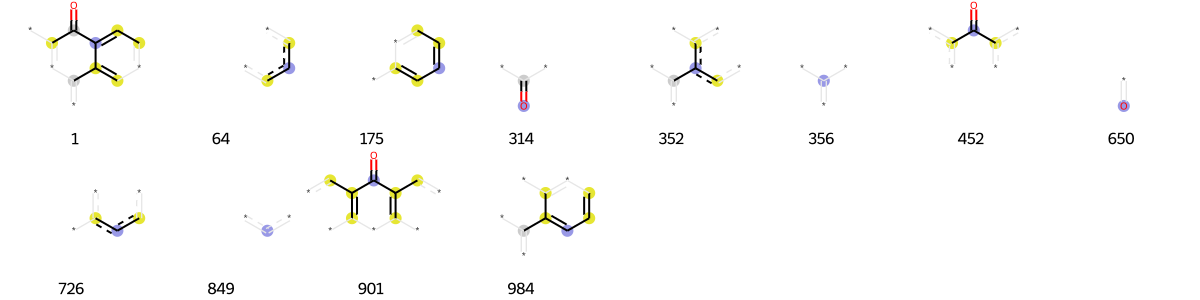

In [2467]:
prints = [(M14, x, bi) for x in fp14.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp14.GetOnBits ()])

In [2468]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[15,
 33,
 64,
 72,
 80,
 108,
 128,
 140,
 147,
 186,
 200,
 214,
 249,
 294,
 309,
 356,
 386,
 440,
 480,
 512,
 585,
 586,
 650,
 672,
 689,
 695,
 698,
 726,
 761,
 792,
 807,
 841,
 849,
 852,
 893,
 946]

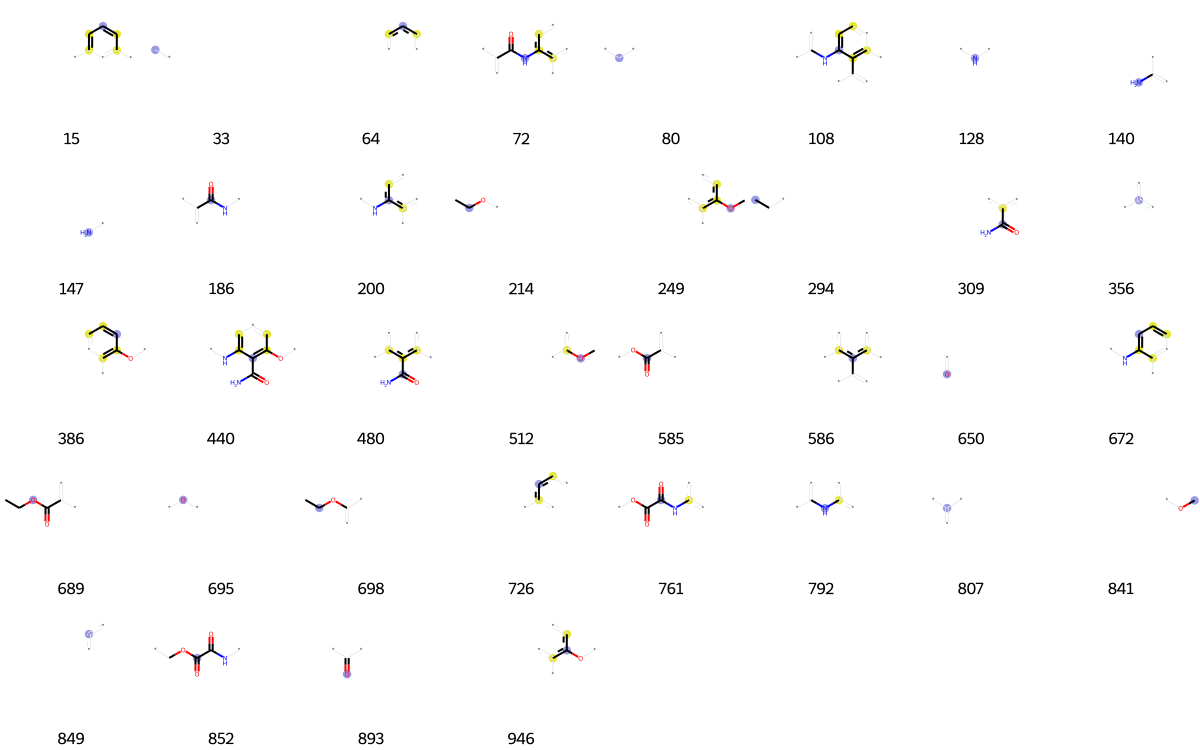

In [2469]:
prints = [(M15, x, bi) for x in fp15.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp15.GetOnBits ()])

In [2470]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

/usr/local/lib/python3.7/dist-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


[1,
 8,
 26,
 28,
 29,
 33,
 36,
 68,
 80,
 138,
 144,
 233,
 243,
 250,
 263,
 268,
 283,
 301,
 389,
 396,
 453,
 497,
 500,
 519,
 528,
 529,
 531,
 540,
 562,
 590,
 650,
 669,
 713,
 739,
 753,
 775,
 784,
 807,
 849,
 854,
 893,
 926,
 927,
 955,
 1013,
 1019]

In [2471]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[80,
 104,
 144,
 147,
 193,
 219,
 310,
 315,
 356,
 451,
 514,
 578,
 583,
 589,
 726,
 730,
 807,
 816,
 849,
 875,
 937,
 981]

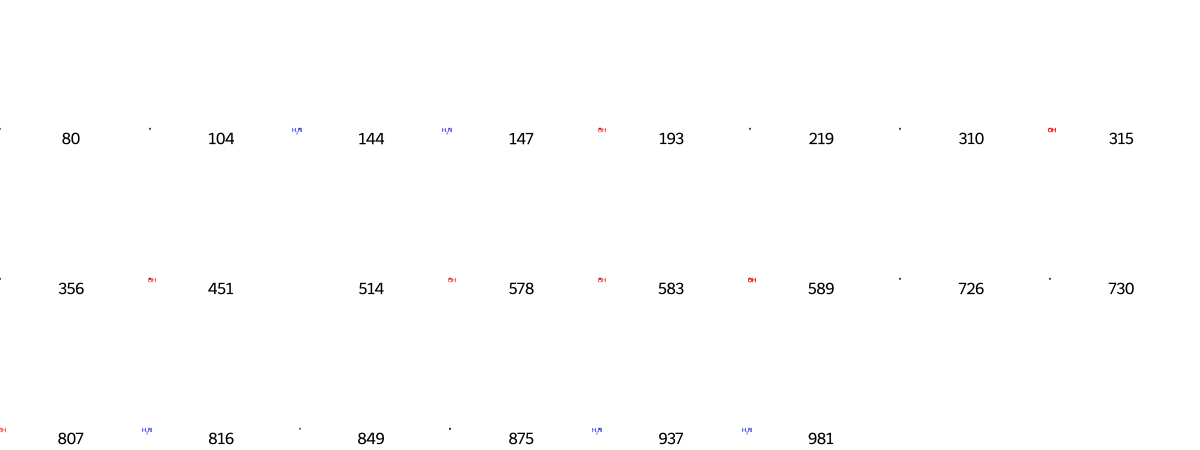

In [2472]:
prints = [(M17, x, bi) for x in fp17.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp17.GetOnBits ()])

In [2473]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[13,
 15,
 33,
 36,
 64,
 80,
 90,
 121,
 128,
 138,
 143,
 145,
 147,
 171,
 175,
 250,
 255,
 256,
 297,
 356,
 389,
 440,
 456,
 458,
 473,
 484,
 537,
 556,
 568,
 586,
 627,
 639,
 650,
 653,
 676,
 688,
 695,
 698,
 710,
 715,
 726,
 753,
 767,
 772,
 785,
 807,
 838,
 841,
 849,
 871,
 875,
 878,
 887,
 893,
 906,
 916,
 926,
 935,
 939,
 987,
 1005,
 1019]

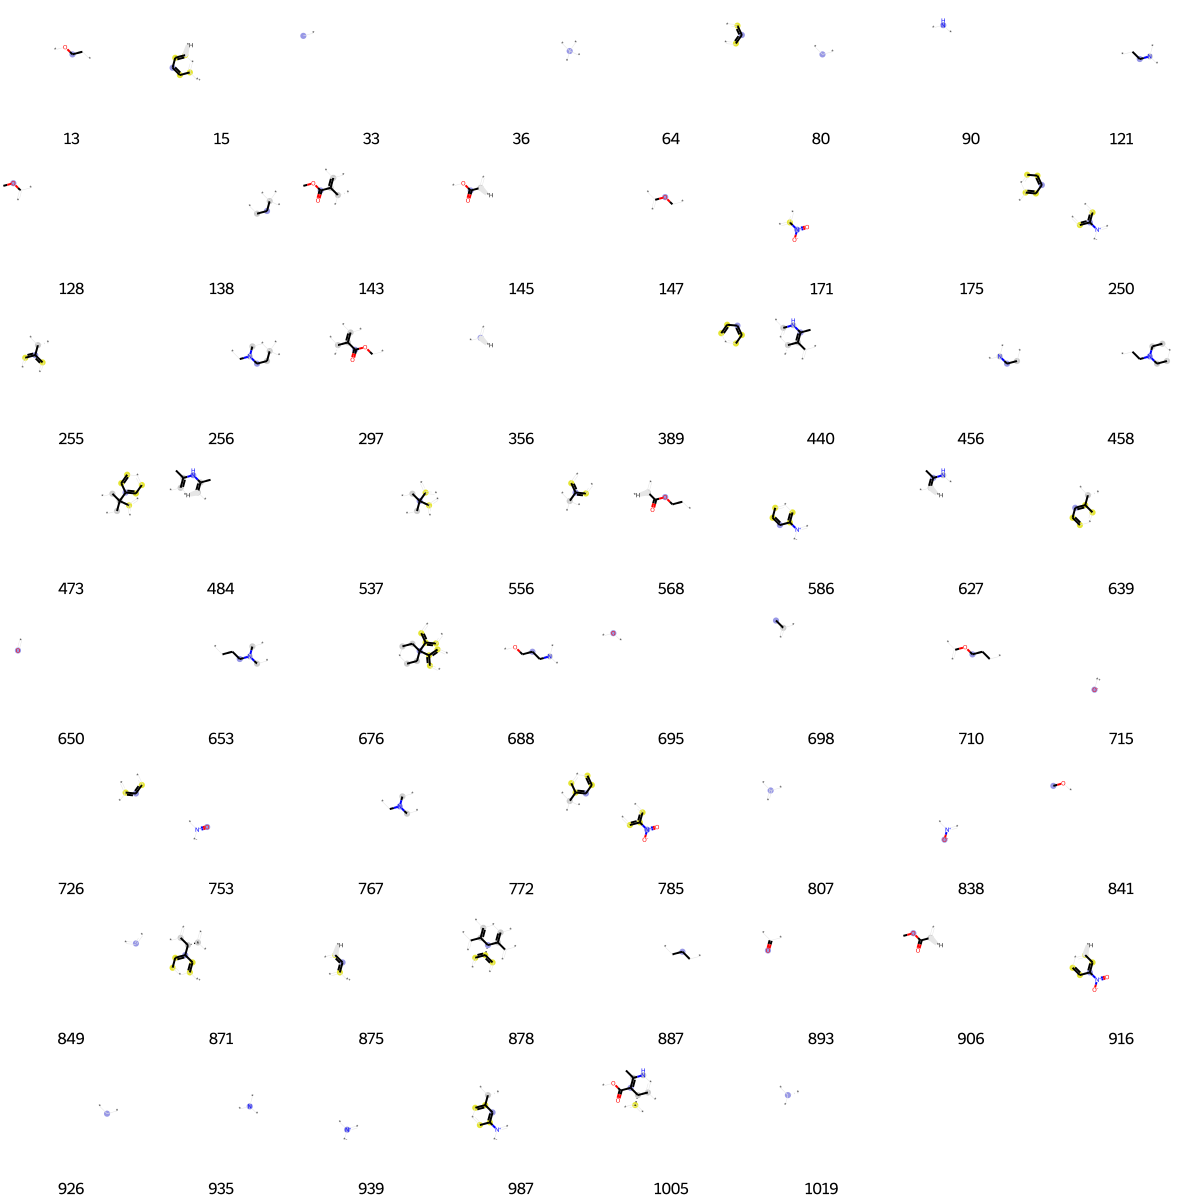

In [2474]:
prints = [(M18, x, bi) for x in fp18.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp18.GetOnBits ()])

In [2475]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[33,
 36,
 42,
 45,
 64,
 80,
 98,
 121,
 123,
 135,
 136,
 168,
 175,
 190,
 214,
 288,
 294,
 314,
 356,
 361,
 365,
 378,
 389,
 428,
 441,
 507,
 511,
 564,
 587,
 605,
 629,
 641,
 650,
 672,
 726,
 730,
 736,
 771,
 801,
 802,
 807,
 831,
 849,
 867,
 881,
 890,
 893,
 932,
 935,
 978,
 1008]

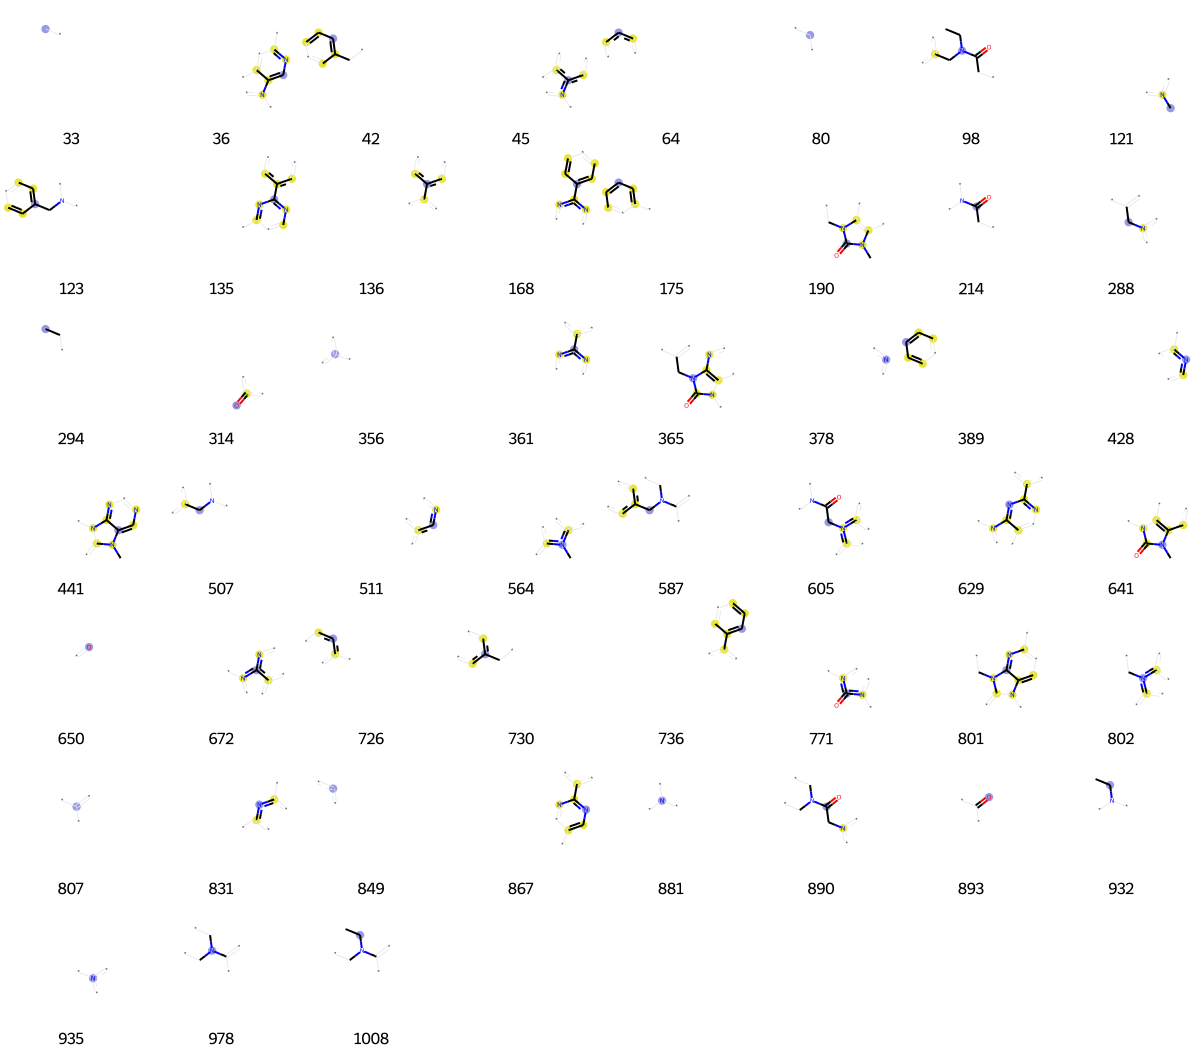

In [2476]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [2477]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[33,
 41,
 80,
 86,
 119,
 125,
 128,
 171,
 197,
 243,
 263,
 294,
 332,
 389,
 401,
 416,
 420,
 540,
 565,
 591,
 597,
 646,
 650,
 667,
 694,
 713,
 731,
 775,
 794,
 807,
 849,
 852,
 887,
 893]

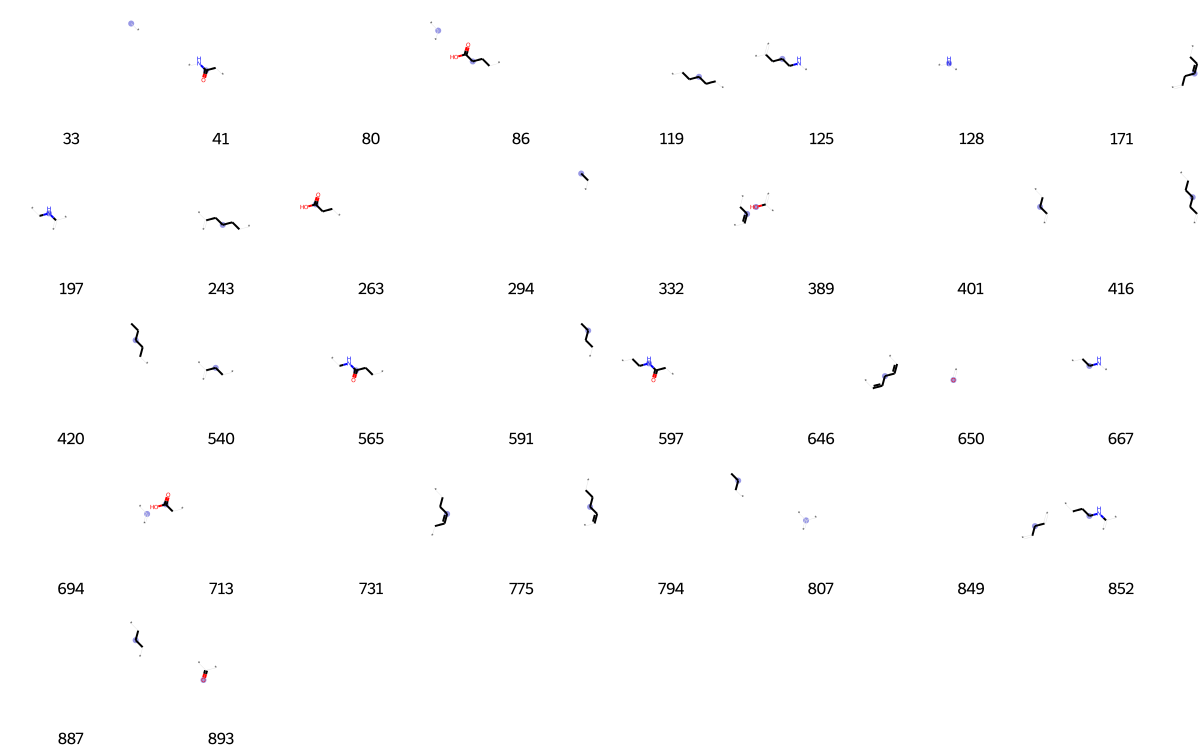

In [2478]:
prints = [(M20, x, bi) for x in fp20.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp20.GetOnBits ()])

In [2479]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[3,
 4,
 15,
 29,
 33,
 34,
 65,
 71,
 80,
 87,
 90,
 99,
 114,
 121,
 126,
 134,
 140,
 146,
 159,
 163,
 204,
 214,
 226,
 236,
 243,
 270,
 285,
 301,
 336,
 344,
 356,
 367,
 378,
 389,
 393,
 407,
 429,
 446,
 456,
 472,
 476,
 507,
 548,
 590,
 647,
 650,
 659,
 698,
 730,
 757,
 759,
 770,
 799,
 807,
 809,
 841,
 849,
 875,
 881,
 893,
 898,
 903,
 904,
 908,
 921,
 926,
 929,
 932,
 935,
 974,
 1019]

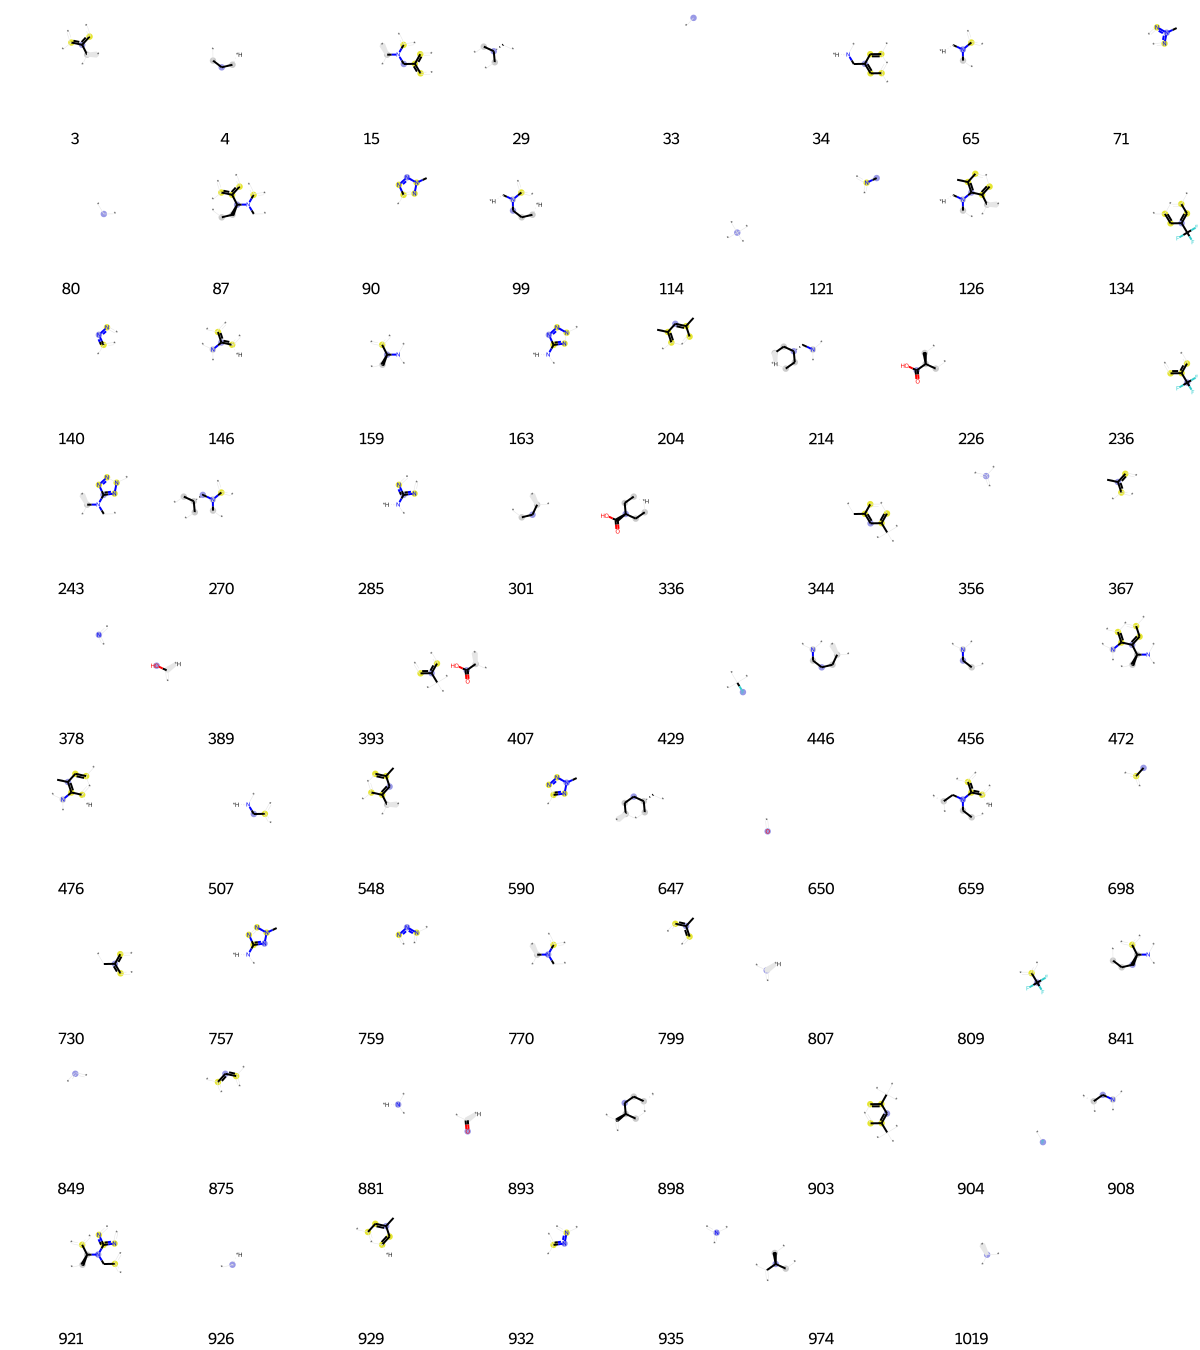

In [2480]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [2481]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[2,
 4,
 10,
 13,
 33,
 45,
 80,
 95,
 102,
 121,
 136,
 213,
 215,
 252,
 289,
 310,
 322,
 333,
 335,
 351,
 356,
 381,
 387,
 389,
 398,
 428,
 456,
 458,
 508,
 533,
 578,
 650,
 659,
 695,
 698,
 718,
 726,
 730,
 741,
 745,
 754,
 767,
 802,
 807,
 808,
 849,
 852,
 875,
 893,
 896,
 926,
 935,
 974,
 994,
 997,
 1017]

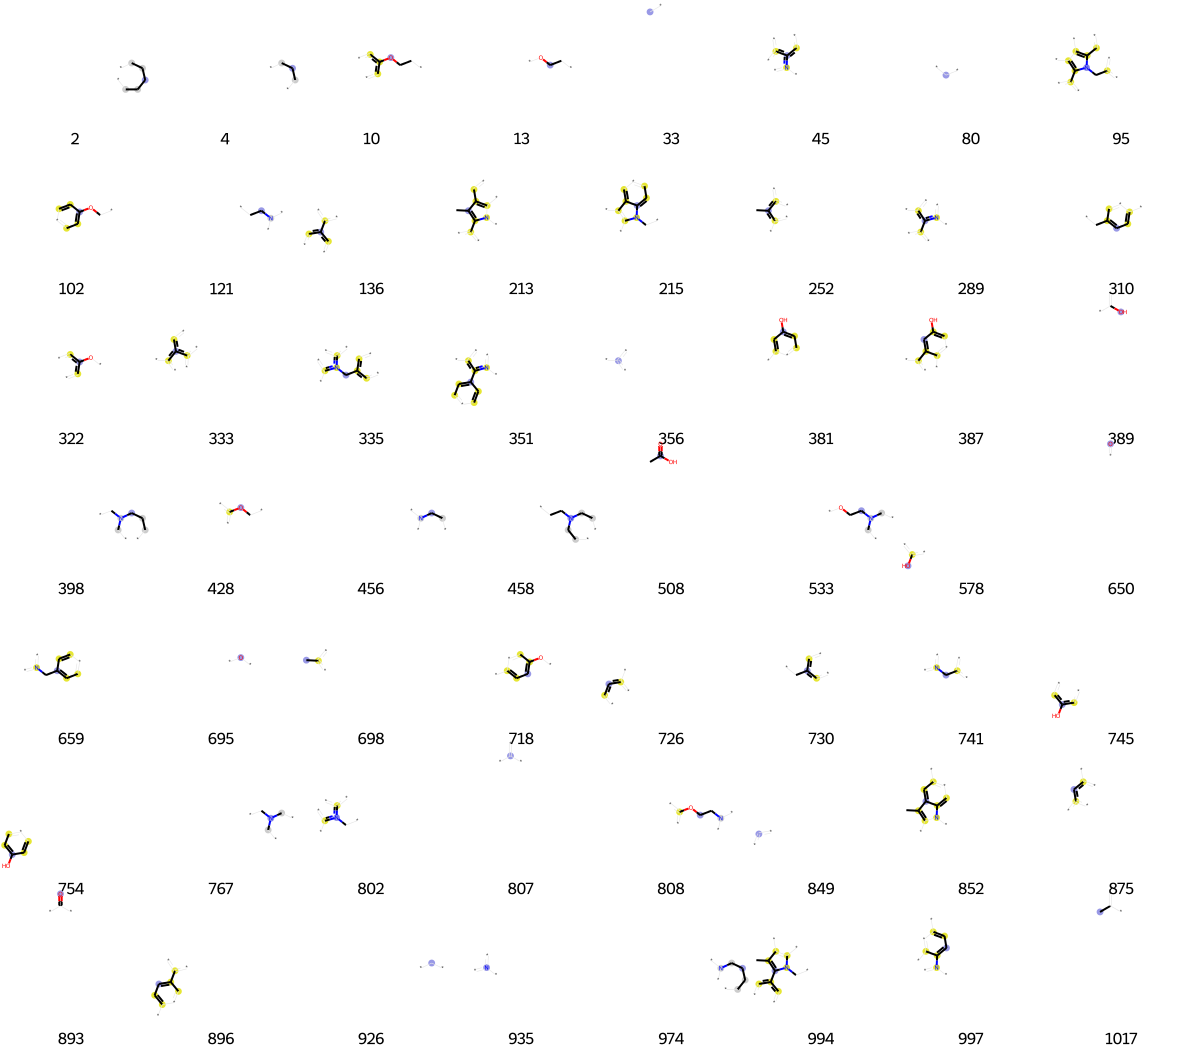

In [2482]:
prints = [(M22, x, bi) for x in fp22.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp22.GetOnBits ()])

In [2483]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[31,
 36,
 59,
 128,
 147,
 157,
 179,
 184,
 191,
 200,
 216,
 242,
 256,
 270,
 356,
 378,
 386,
 428,
 433,
 486,
 511,
 523,
 528,
 567,
 646,
 650,
 656,
 659,
 675,
 699,
 702,
 726,
 792,
 794,
 804,
 807,
 810,
 816,
 843,
 847,
 849,
 855,
 871,
 873,
 875,
 883,
 893,
 899,
 904,
 919,
 926,
 954,
 956,
 969,
 997,
 1019]

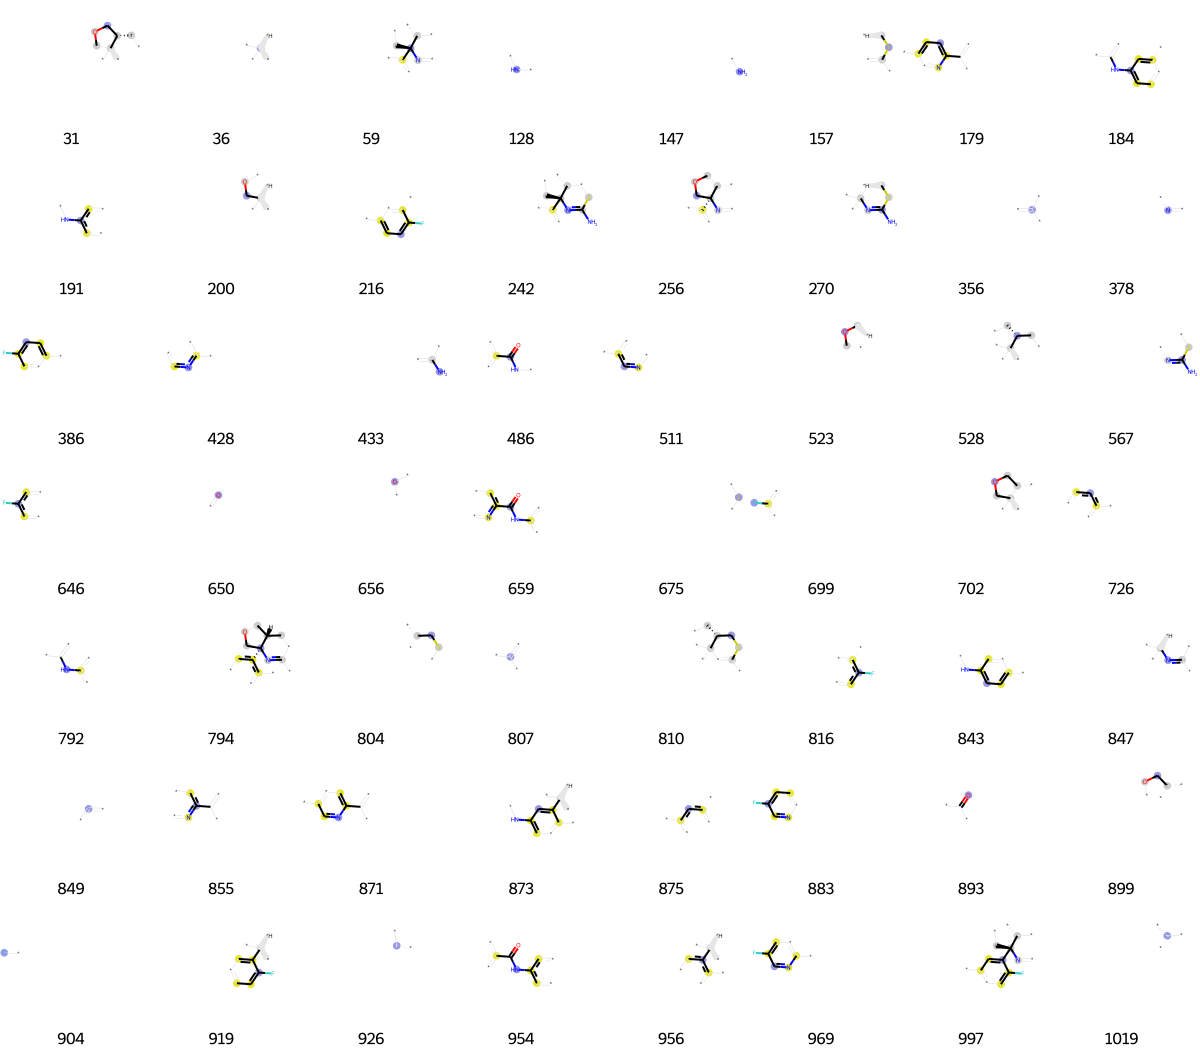

In [2484]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [2485]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[4,
 33,
 36,
 67,
 88,
 97,
 112,
 114,
 128,
 138,
 199,
 204,
 217,
 233,
 255,
 262,
 266,
 314,
 345,
 356,
 360,
 378,
 388,
 406,
 419,
 426,
 428,
 429,
 439,
 463,
 486,
 511,
 565,
 636,
 650,
 656,
 662,
 674,
 693,
 699,
 726,
 735,
 738,
 790,
 800,
 801,
 807,
 809,
 813,
 814,
 816,
 849,
 872,
 875,
 893,
 899,
 904,
 917,
 926,
 930,
 935,
 965,
 967,
 1002,
 1004]

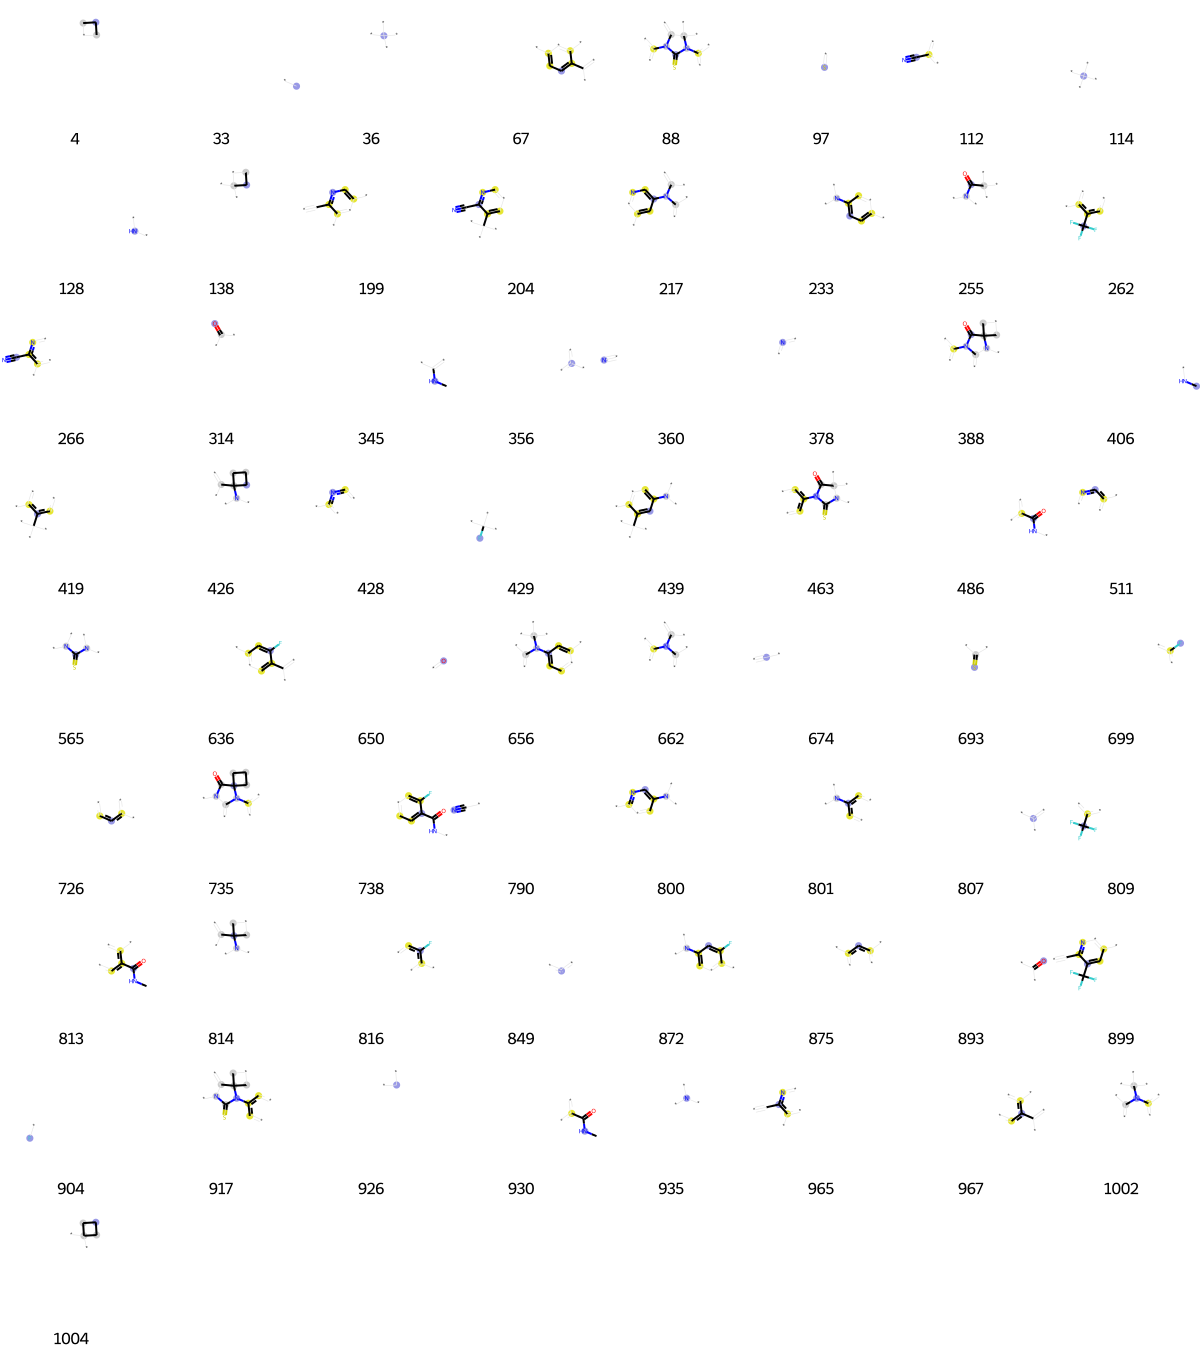

In [2486]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [2487]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[33,
 36,
 63,
 64,
 114,
 138,
 147,
 175,
 194,
 311,
 356,
 389,
 392,
 408,
 456,
 473,
 496,
 537,
 556,
 676,
 726,
 772,
 849,
 926,
 935]

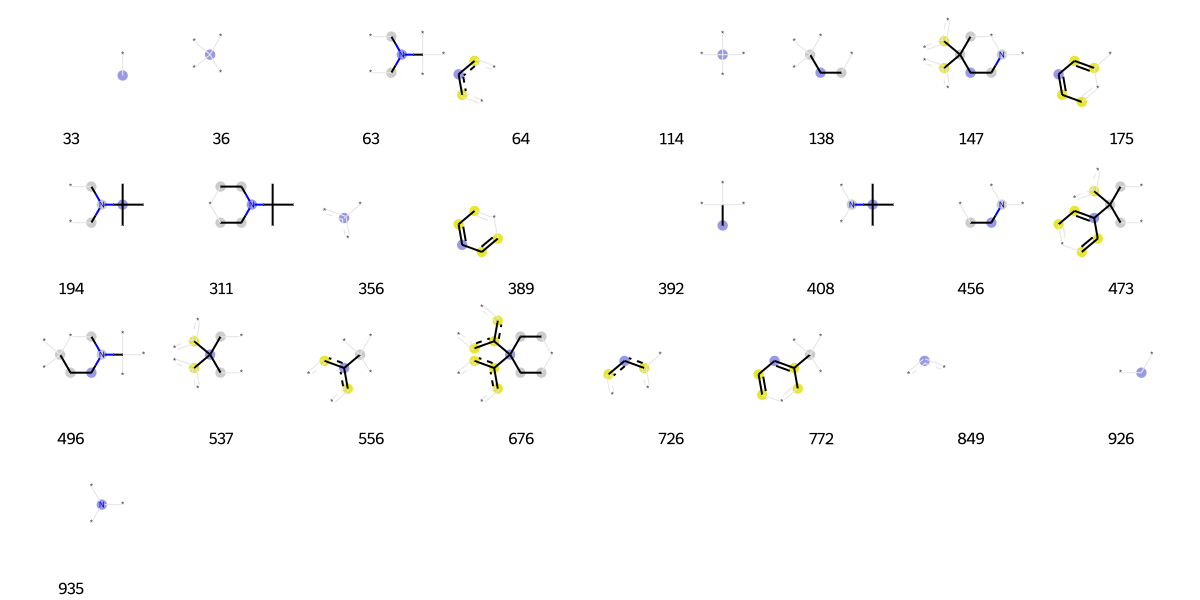

In [2488]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [2489]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[9,
 33,
 59,
 67,
 205,
 235,
 322,
 356,
 361,
 406,
 512,
 578,
 583,
 650,
 673,
 695,
 698,
 718,
 726,
 745,
 751,
 781,
 799,
 807,
 841,
 849,
 875,
 893,
 896,
 948,
 967]

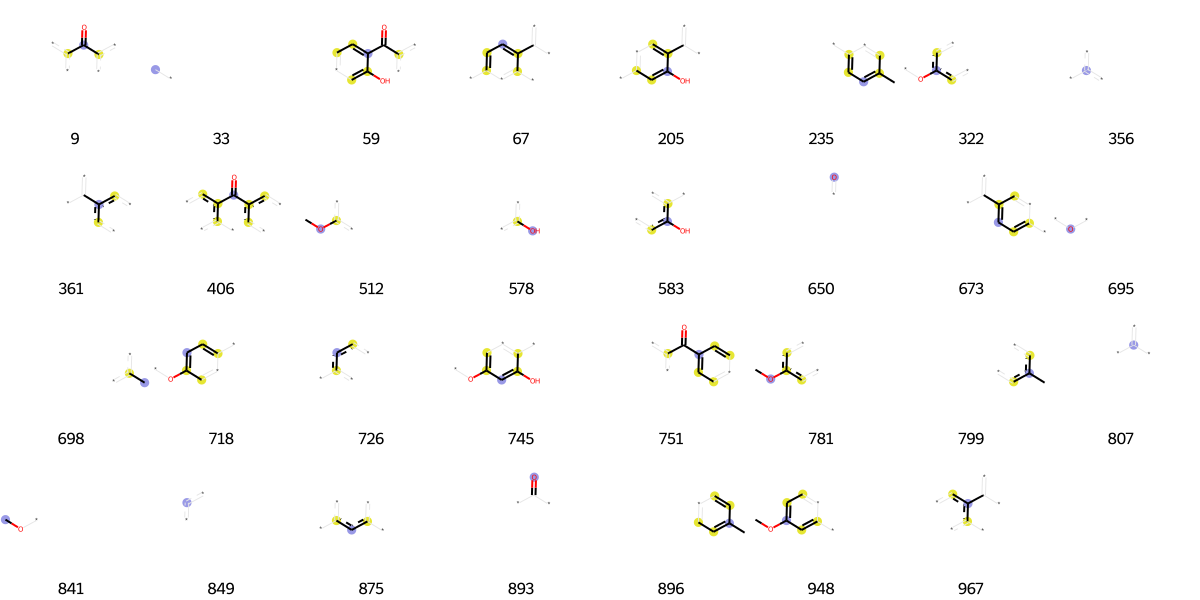

In [2490]:
prints = [(M26, x, bi) for x in fp26.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp26.GetOnBits ()])

In [2491]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[26,
 90,
 119,
 140,
 147,
 261,
 309,
 356,
 361,
 482,
 522,
 650,
 673,
 703,
 711,
 726,
 806,
 807,
 831,
 838,
 849,
 875,
 893,
 915,
 926,
 977]

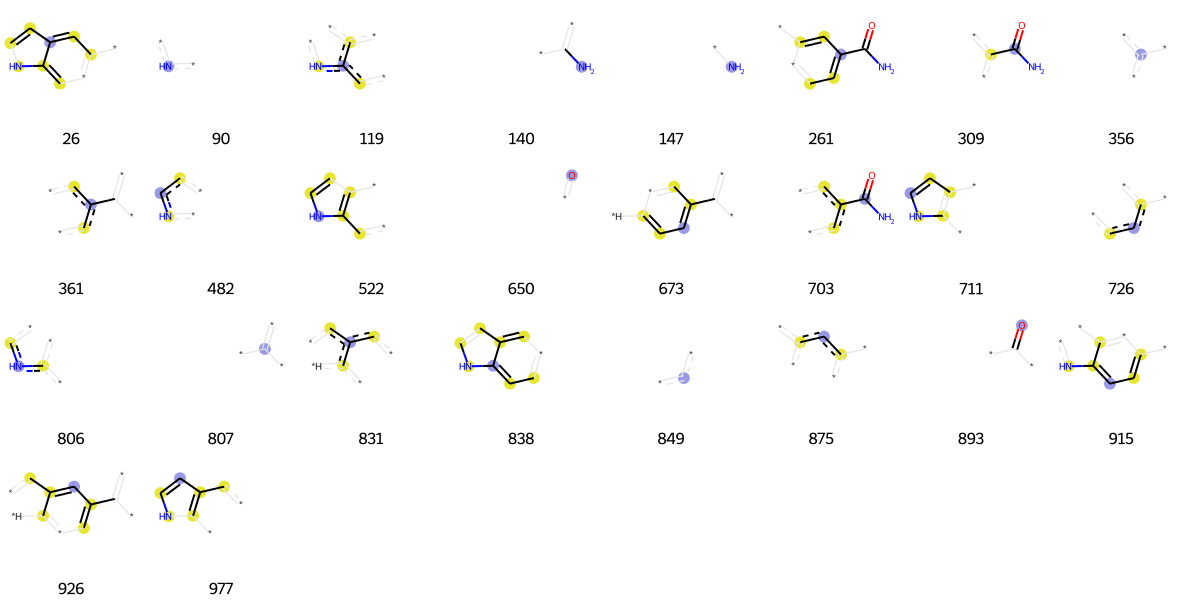

In [2492]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [2493]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[1,
 2,
 4,
 33,
 36,
 64,
 80,
 82,
 92,
 104,
 116,
 128,
 138,
 175,
 194,
 200,
 250,
 283,
 294,
 310,
 313,
 319,
 325,
 352,
 356,
 377,
 396,
 458,
 485,
 493,
 520,
 527,
 543,
 614,
 650,
 672,
 680,
 687,
 726,
 792,
 807,
 849,
 893,
 926,
 992]

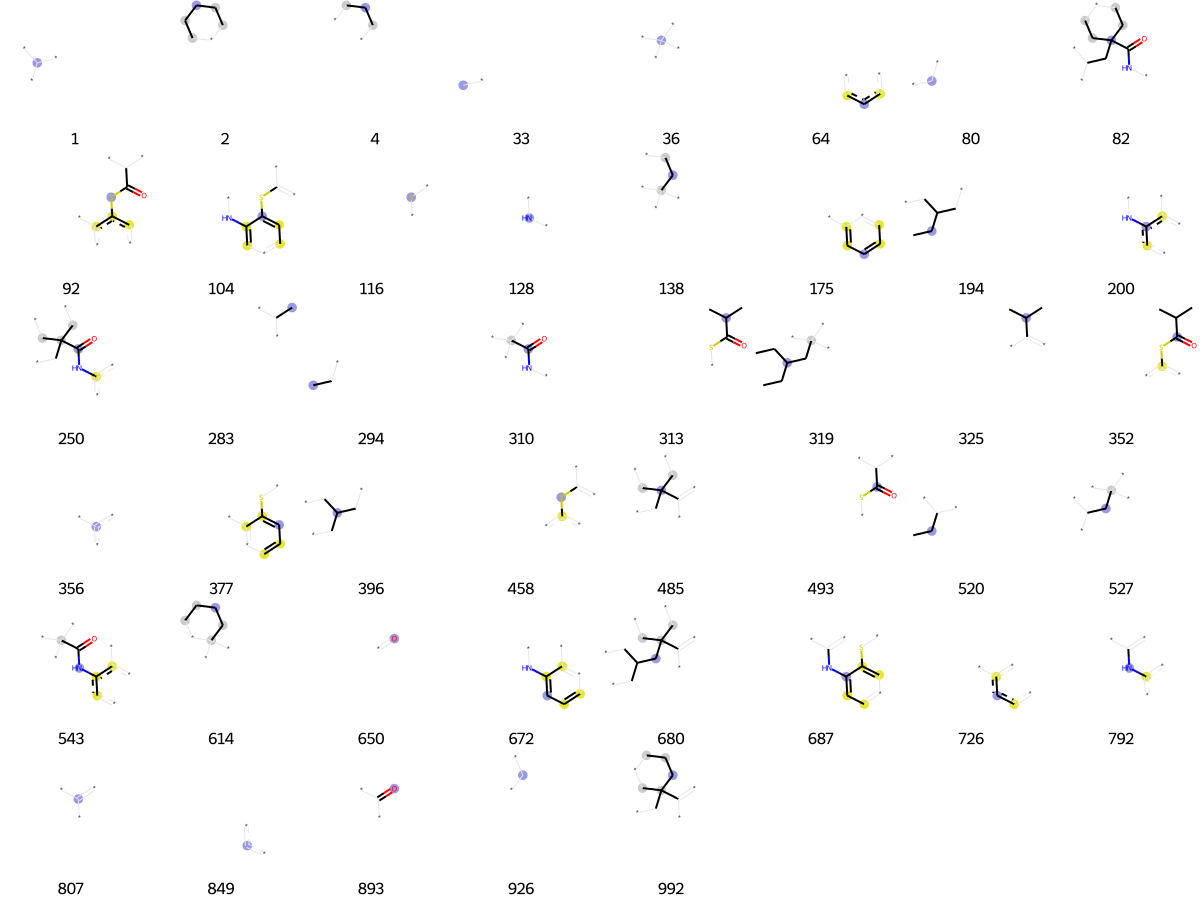

In [2494]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [2495]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[33,
 59,
 64,
 71,
 81,
 90,
 128,
 136,
 140,
 168,
 175,
 184,
 194,
 235,
 242,
 245,
 246,
 249,
 257,
 278,
 333,
 350,
 356,
 361,
 378,
 383,
 386,
 401,
 428,
 430,
 445,
 452,
 502,
 511,
 512,
 552,
 579,
 593,
 601,
 650,
 695,
 698,
 708,
 726,
 799,
 802,
 818,
 831,
 841,
 842,
 849,
 887,
 946,
 983]

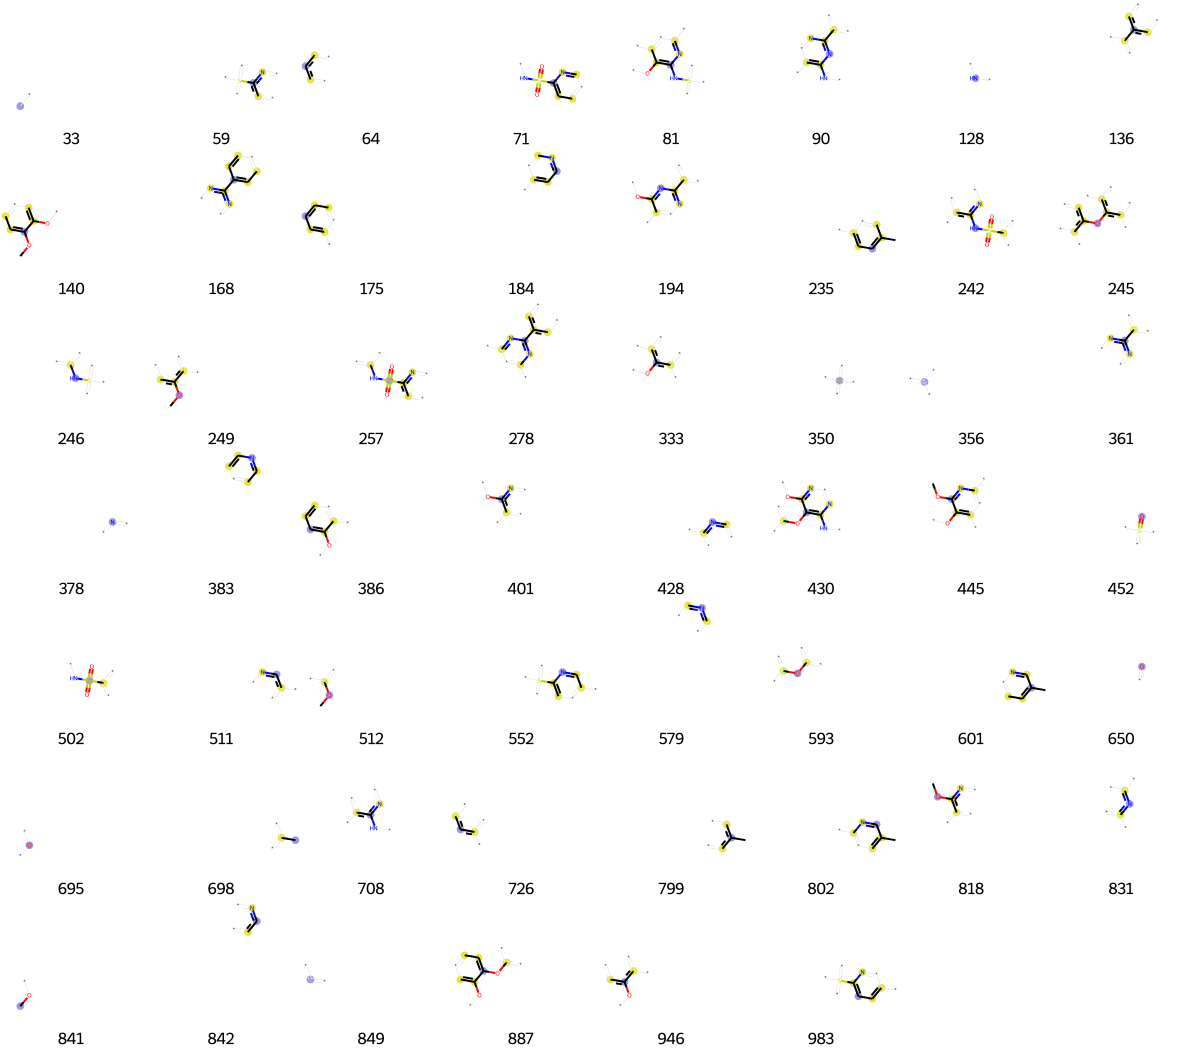

In [2496]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [2497]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[85,
 93,
 233,
 263,
 301,
 303,
 456,
 463,
 593,
 739,
 807,
 830,
 849,
 861,
 899,
 926,
 935,
 981,
 993,
 1019]

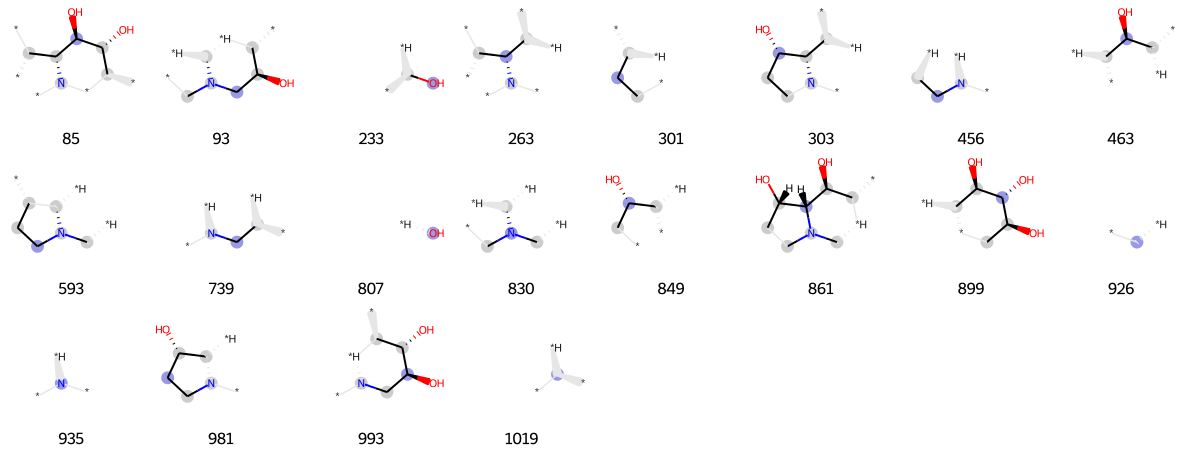

In [2498]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [2499]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[33, 80, 106, 119, 222, 294, 420, 473, 541, 591, 794, 807, 887]

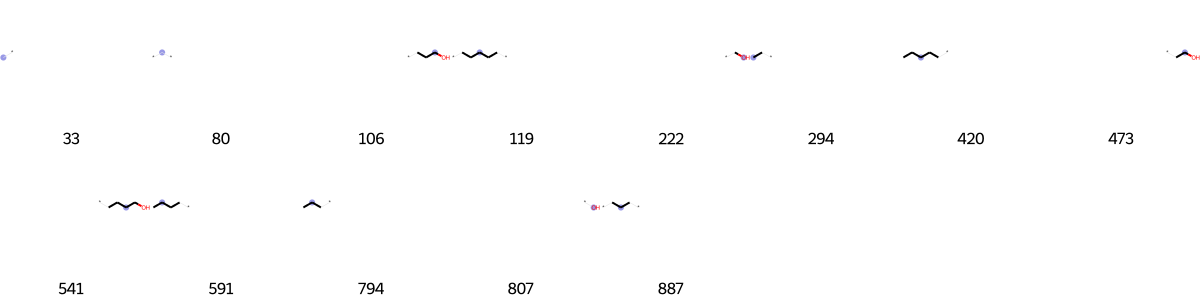

In [2500]:
prints = [(M31, x, bi) for x in fp31.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp31.GetOnBits ()])

In [2501]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[10,
 15,
 16,
 32,
 33,
 36,
 41,
 46,
 49,
 64,
 80,
 90,
 106,
 119,
 128,
 136,
 140,
 162,
 163,
 168,
 175,
 192,
 197,
 216,
 219,
 231,
 241,
 248,
 250,
 252,
 288,
 301,
 313,
 314,
 352,
 356,
 378,
 383,
 386,
 428,
 469,
 482,
 533,
 547,
 551,
 558,
 561,
 574,
 582,
 592,
 597,
 629,
 650,
 659,
 661,
 667,
 675,
 676,
 681,
 683,
 695,
 698,
 710,
 714,
 723,
 724,
 726,
 807,
 816,
 820,
 834,
 849,
 852,
 879,
 885,
 887,
 893,
 896,
 898,
 917,
 926,
 935,
 938,
 946,
 953,
 969,
 973,
 980,
 984,
 1004,
 1019]

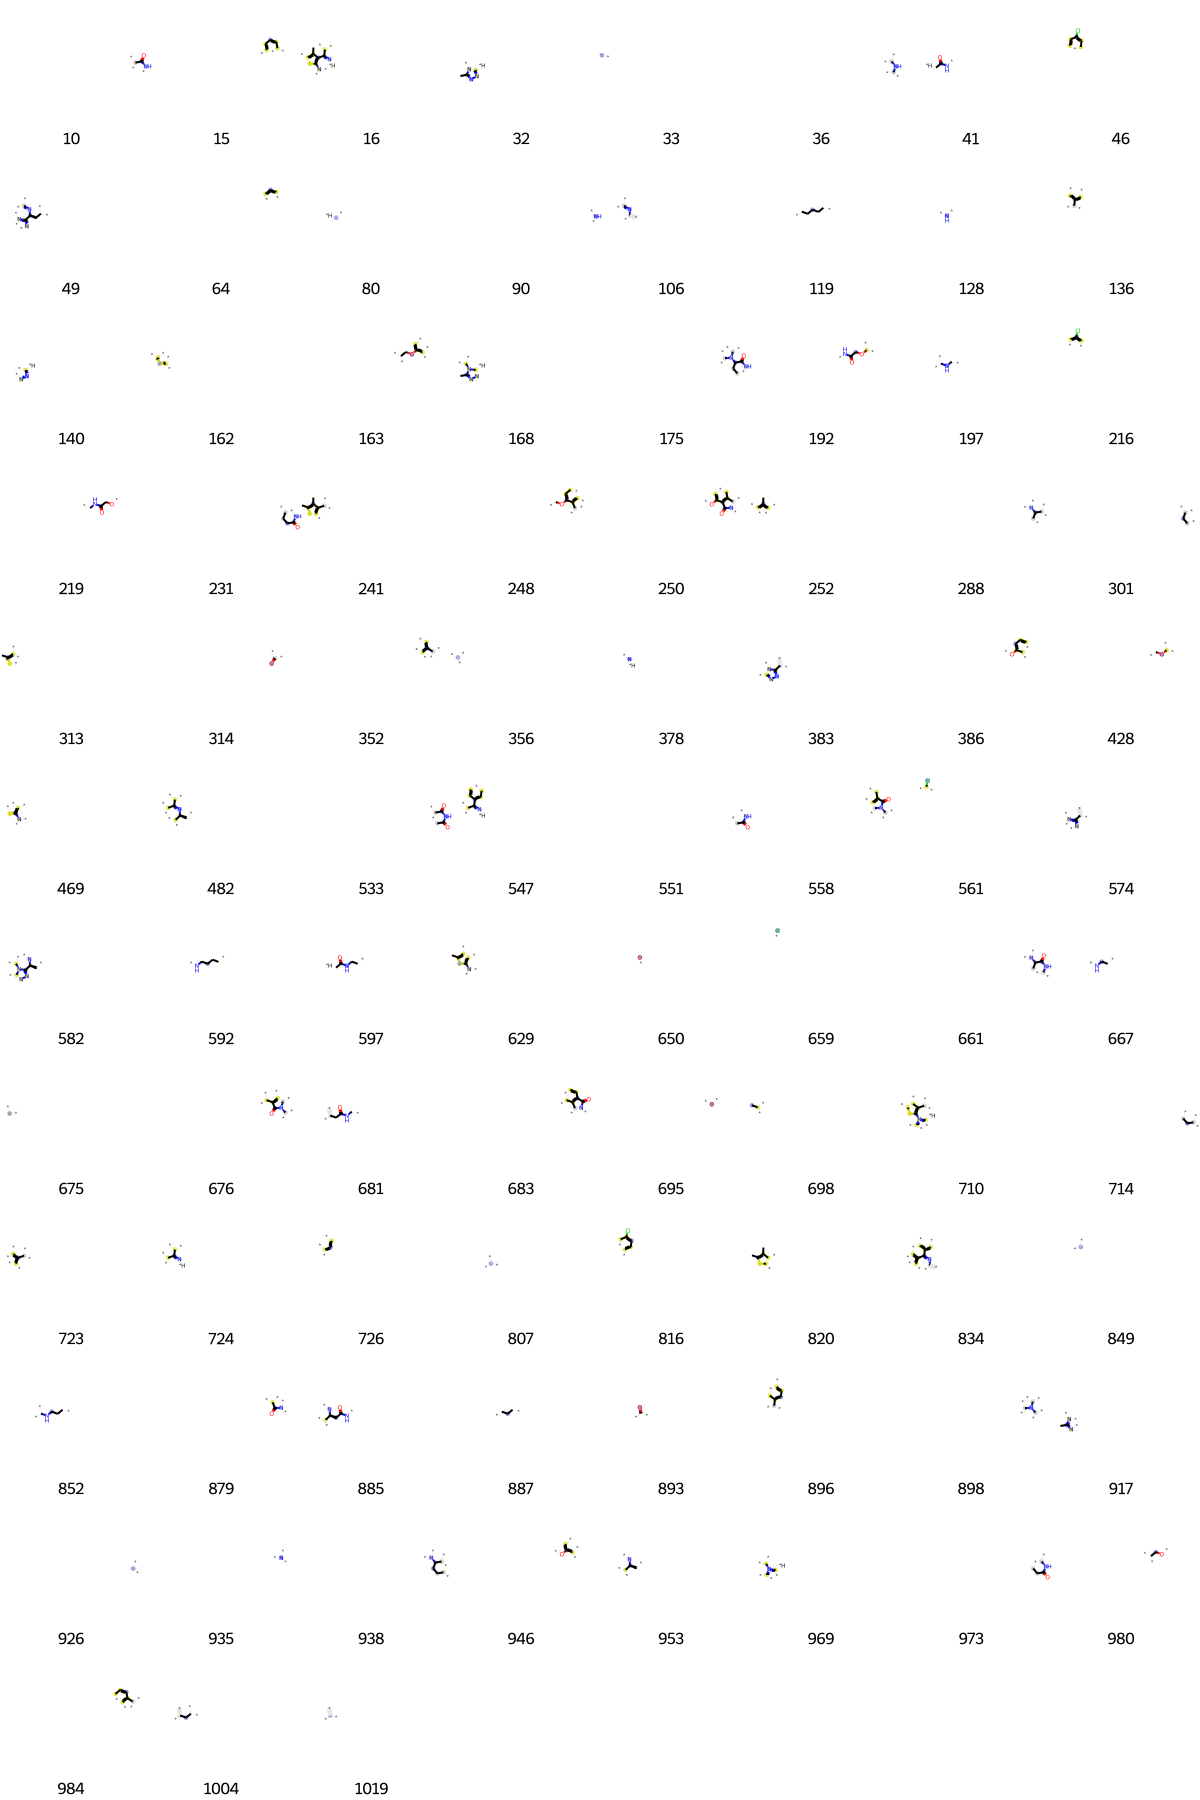

In [2502]:
prints = [(M32, x, bi) for x in fp32.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp32.GetOnBits ()])

In [2503]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[33,
 64,
 90,
 119,
 145,
 175,
 186,
 244,
 263,
 328,
 333,
 356,
 463,
 549,
 584,
 673,
 691,
 694,
 726,
 759,
 806,
 816,
 835,
 849,
 855,
 860,
 878,
 913,
 961,
 976,
 1003,
 1009]

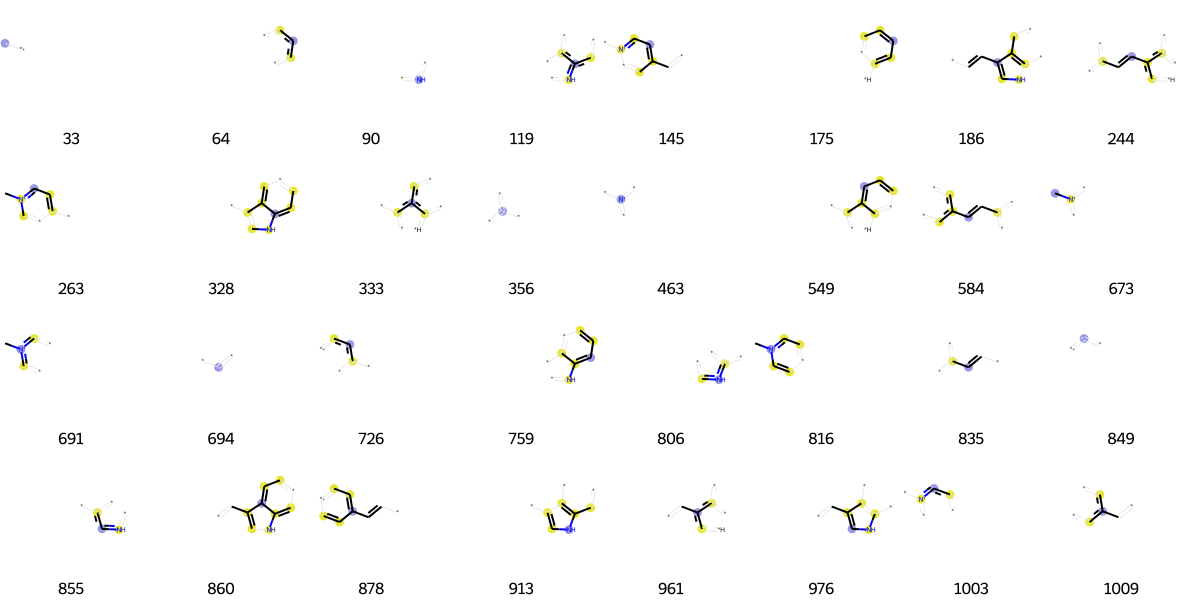

In [2504]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [2505]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[166,
 203,
 209,
 239,
 246,
 314,
 320,
 356,
 417,
 580,
 600,
 614,
 650,
 656,
 667,
 726,
 736,
 784,
 787,
 803,
 831,
 849,
 852,
 875,
 983]

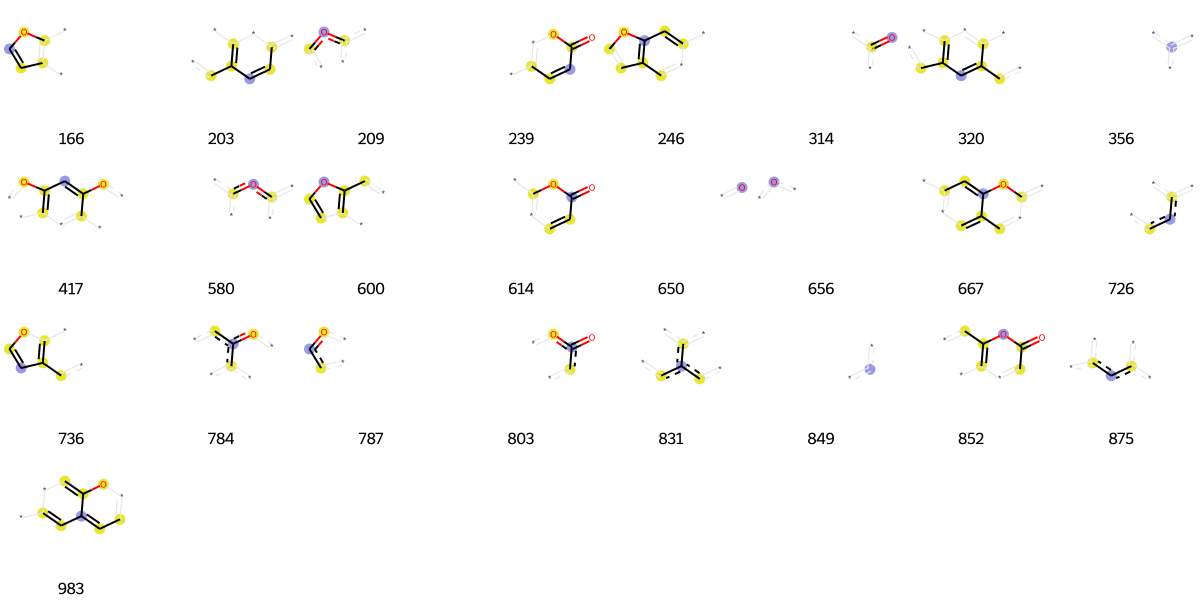

In [2506]:
prints = [(M34, x, bi) for x in fp34.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp34.GetOnBits ()])

In [2507]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[8,
 33,
 53,
 72,
 80,
 109,
 114,
 123,
 125,
 128,
 130,
 145,
 191,
 193,
 197,
 201,
 255,
 263,
 265,
 301,
 310,
 317,
 322,
 356,
 361,
 363,
 385,
 389,
 392,
 403,
 404,
 410,
 429,
 484,
 486,
 507,
 540,
 548,
 594,
 641,
 650,
 662,
 667,
 673,
 695,
 713,
 718,
 726,
 730,
 792,
 807,
 809,
 843,
 849,
 881,
 893,
 904,
 926,
 1005,
 1019]

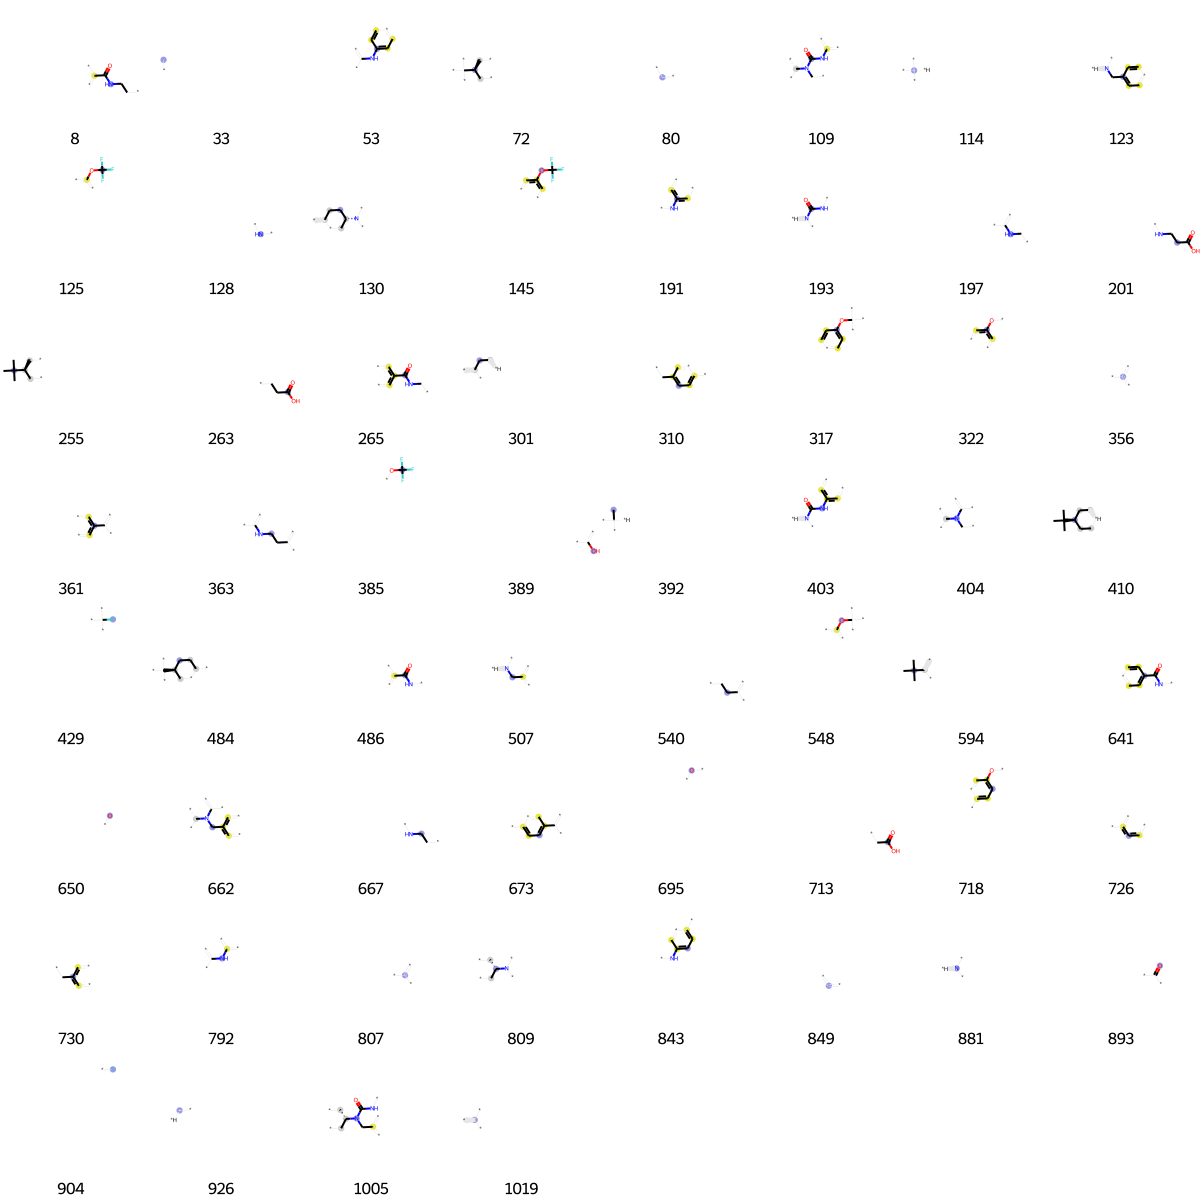

In [2508]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [2509]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[33,
 90,
 92,
 121,
 136,
 155,
 184,
 207,
 212,
 222,
 301,
 352,
 356,
 378,
 383,
 386,
 390,
 420,
 456,
 488,
 552,
 579,
 646,
 661,
 699,
 708,
 721,
 726,
 802,
 842,
 849,
 870,
 875,
 896,
 904,
 926,
 927,
 935,
 976,
 993,
 1019]

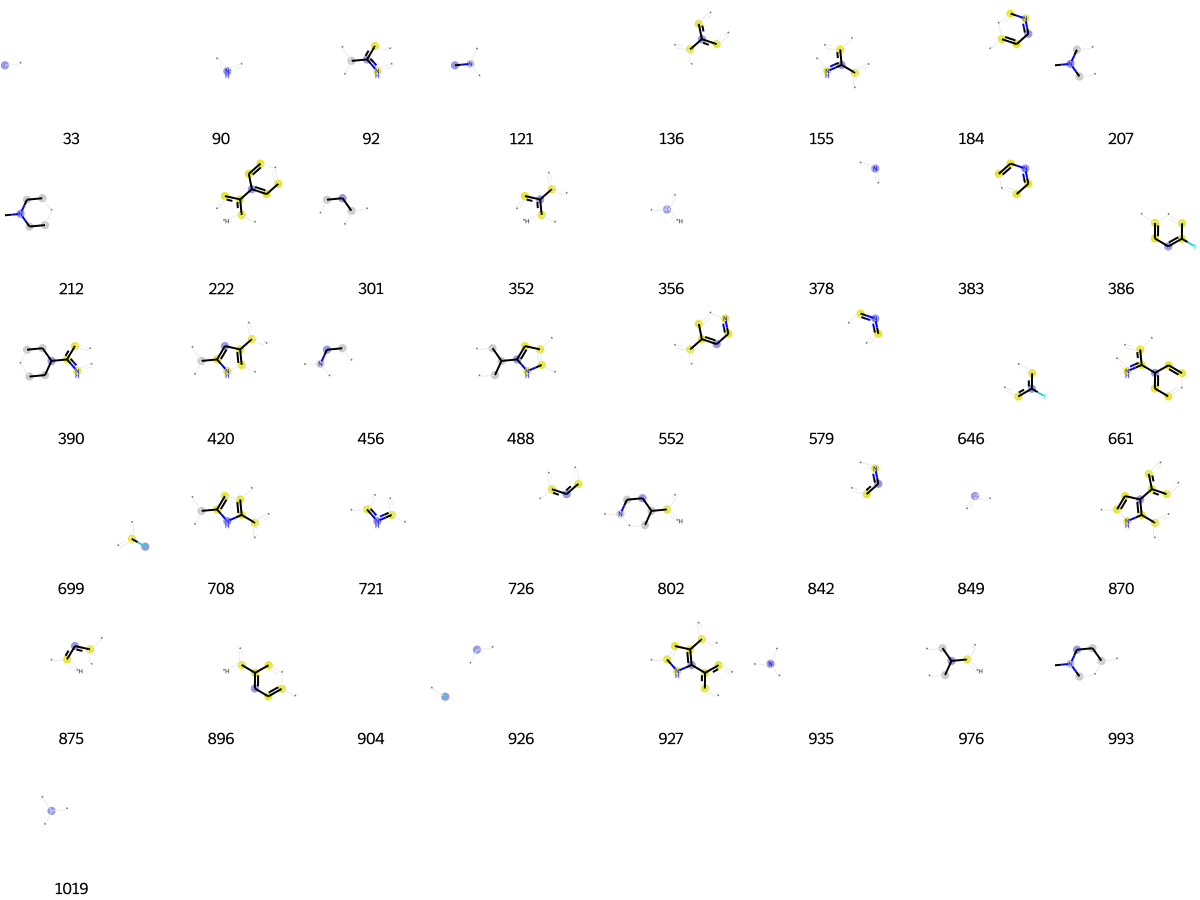

In [2510]:
prints = [(M36, x, bi) for x in fp36.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp36.GetOnBits ()])

In [2511]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[33,
 36,
 54,
 136,
 144,
 157,
 167,
 171,
 202,
 218,
 249,
 285,
 314,
 356,
 451,
 472,
 501,
 512,
 525,
 578,
 580,
 583,
 585,
 614,
 650,
 656,
 695,
 726,
 745,
 784,
 807,
 841,
 845,
 849,
 875,
 896,
 897,
 946,
 960,
 1004]

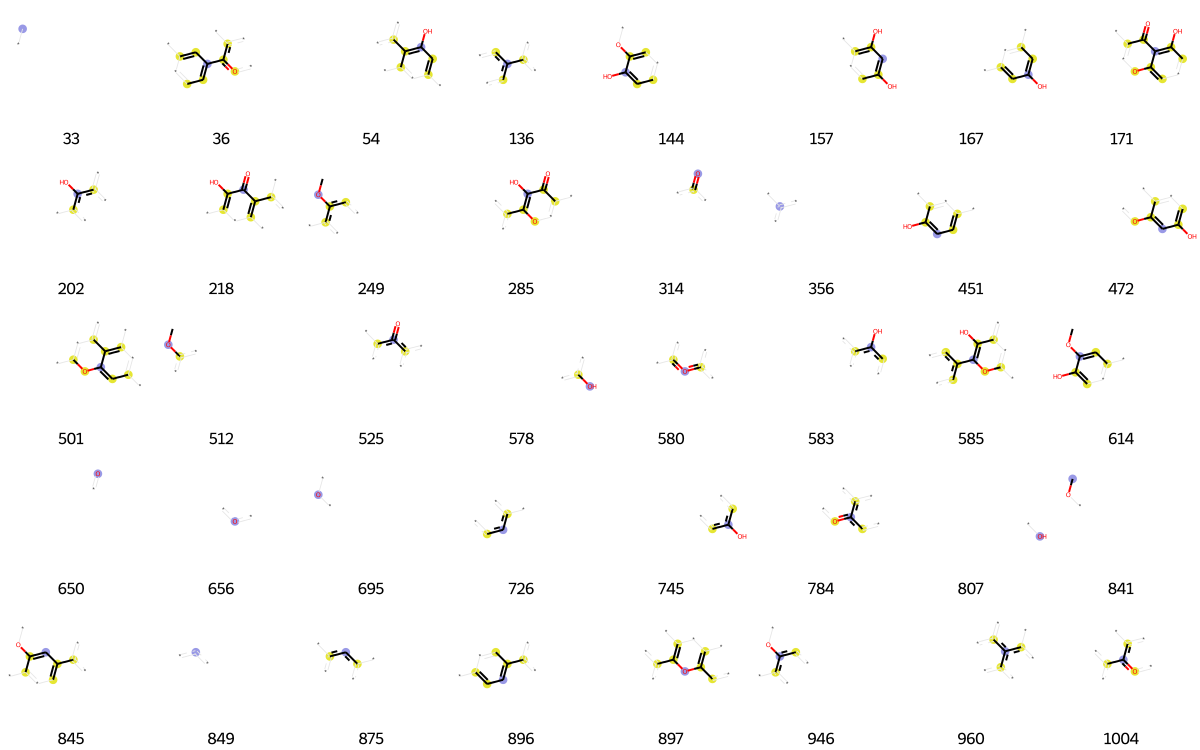

In [2512]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [2513]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[26,
 32,
 41,
 42,
 64,
 80,
 116,
 128,
 140,
 158,
 162,
 175,
 219,
 251,
 295,
 325,
 356,
 378,
 385,
 389,
 536,
 554,
 650,
 675,
 683,
 726,
 730,
 732,
 735,
 755,
 792,
 807,
 849,
 893,
 913,
 953,
 975]

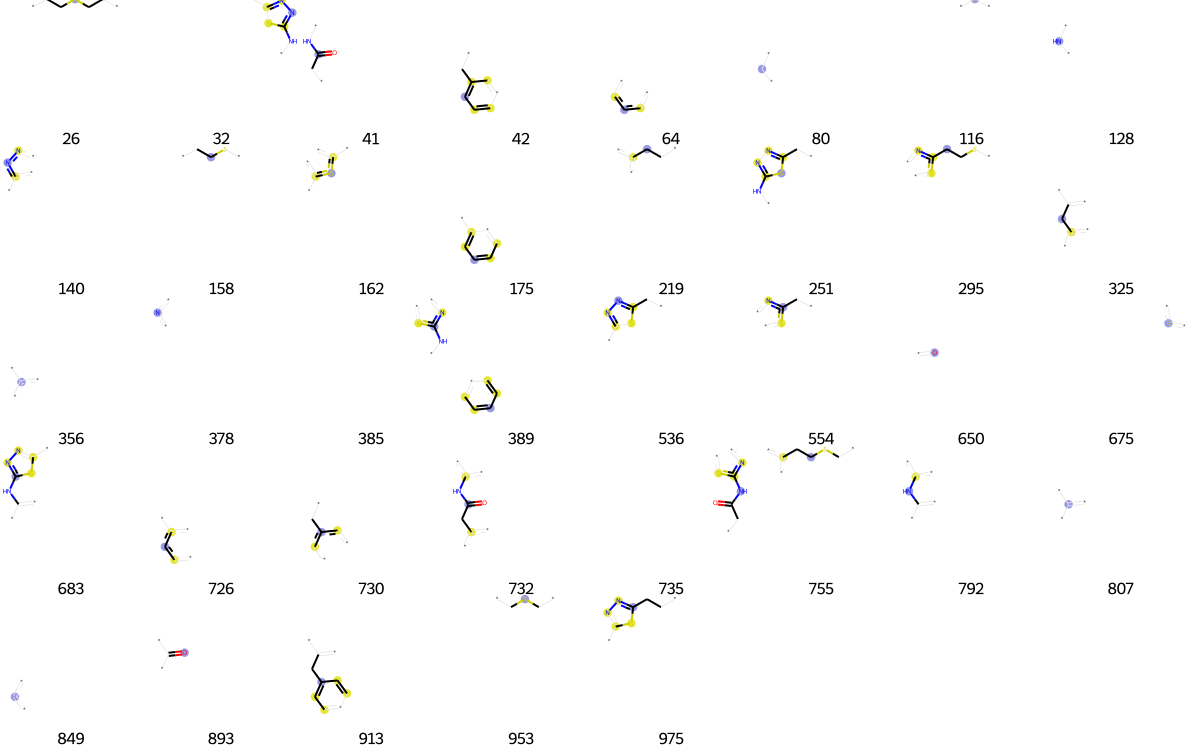

In [2514]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [2515]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[30,
 33,
 35,
 134,
 166,
 204,
 221,
 268,
 301,
 356,
 367,
 378,
 433,
 451,
 516,
 563,
 576,
 585,
 588,
 656,
 669,
 698,
 723,
 755,
 799,
 849,
 875,
 925,
 926,
 929,
 983,
 1019,
 1023]

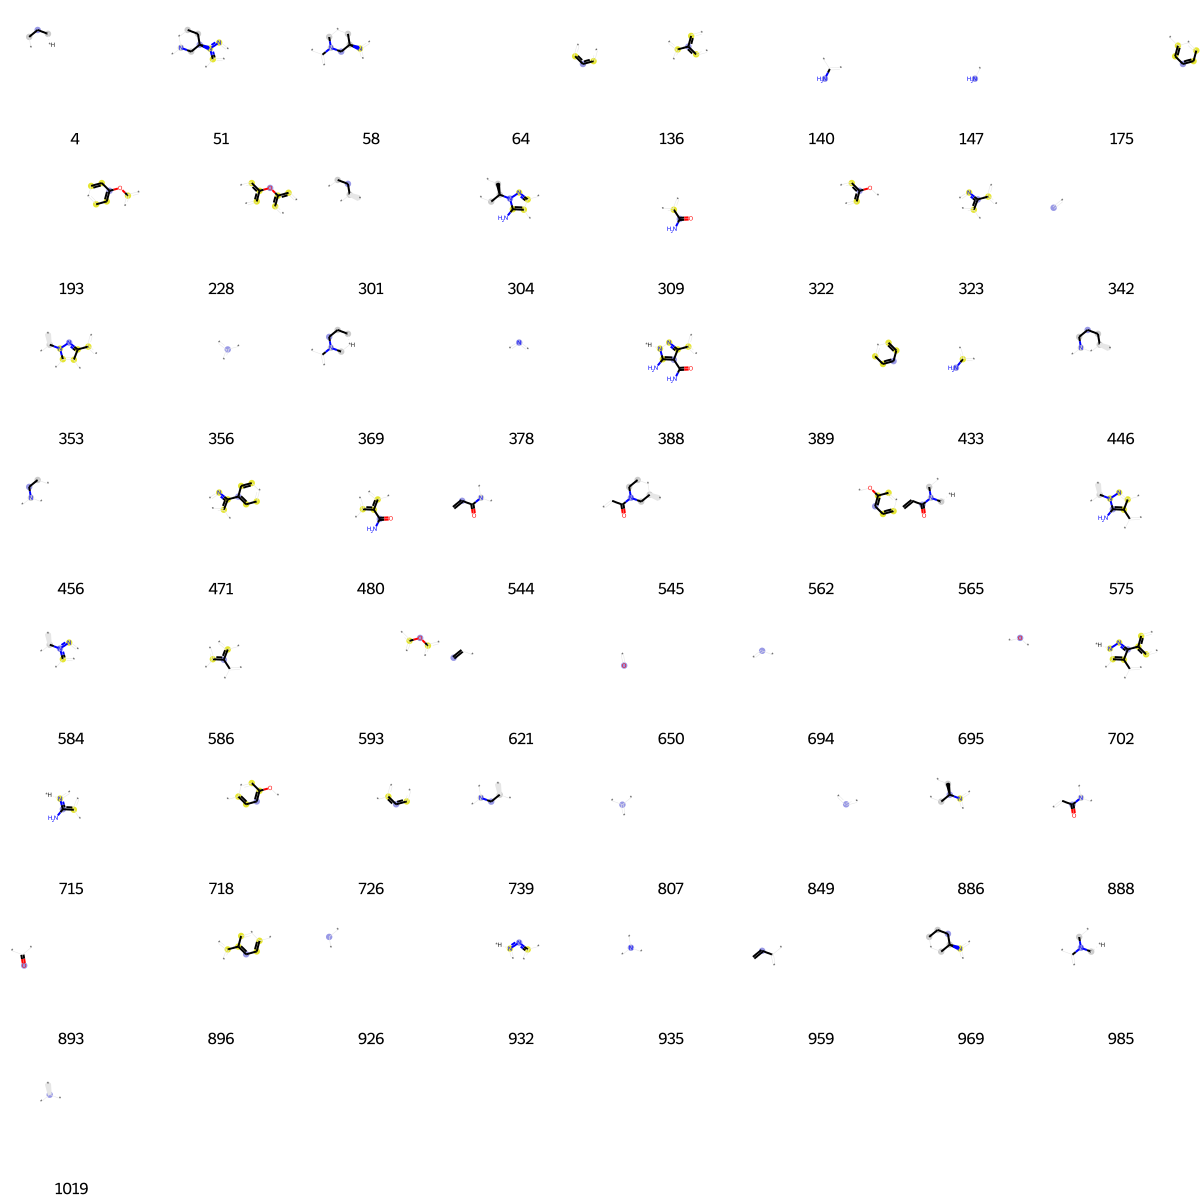

In [2516]:
prints = [(M39, x, bi) for x in fp39.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp39.GetOnBits ()])

In [2517]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[3,
 8,
 64,
 80,
 114,
 147,
 175,
 209,
 268,
 285,
 301,
 337,
 340,
 356,
 371,
 389,
 407,
 433,
 457,
 532,
 650,
 656,
 675,
 677,
 705,
 708,
 726,
 727,
 759,
 786,
 807,
 849,
 881,
 893,
 905,
 920,
 926,
 953,
 1019]

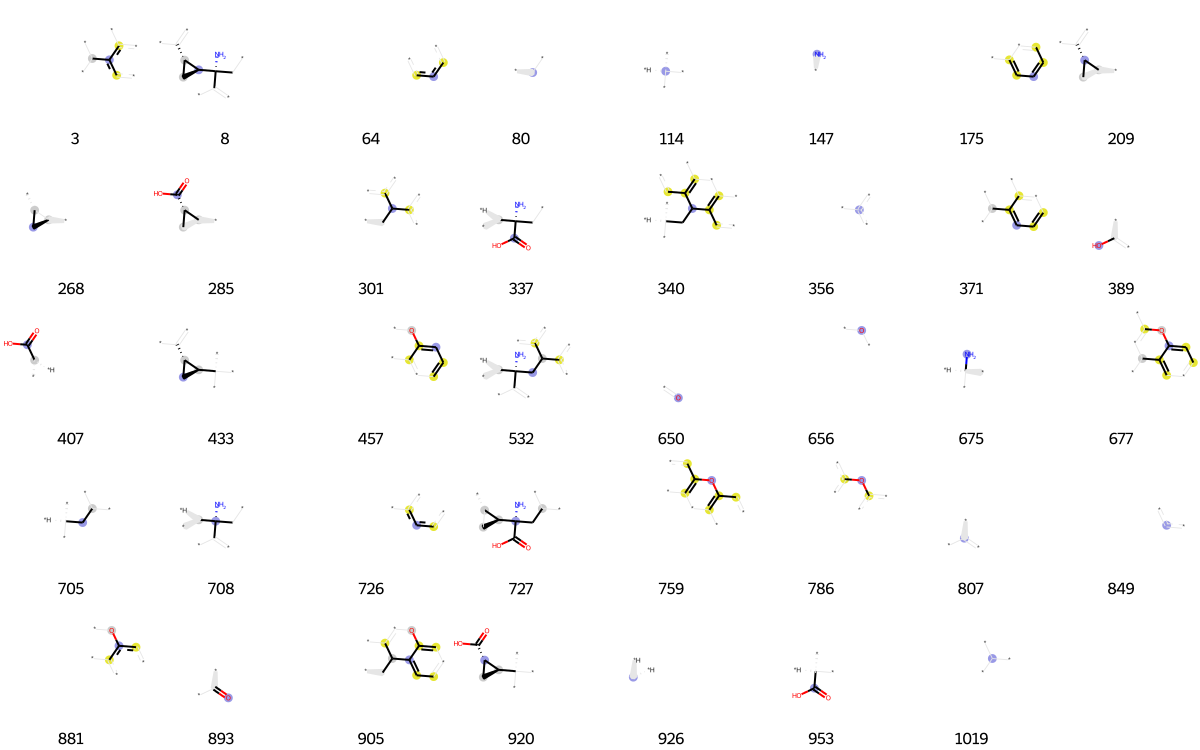

In [2518]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [2519]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[1,
 23,
 33,
 42,
 64,
 80,
 86,
 117,
 128,
 147,
 163,
 175,
 238,
 283,
 294,
 304,
 356,
 389,
 458,
 488,
 508,
 573,
 591,
 629,
 635,
 650,
 680,
 694,
 695,
 726,
 730,
 734,
 736,
 739,
 745,
 759,
 794,
 807,
 823,
 849,
 887,
 890,
 893,
 905,
 953,
 1004,
 1018]

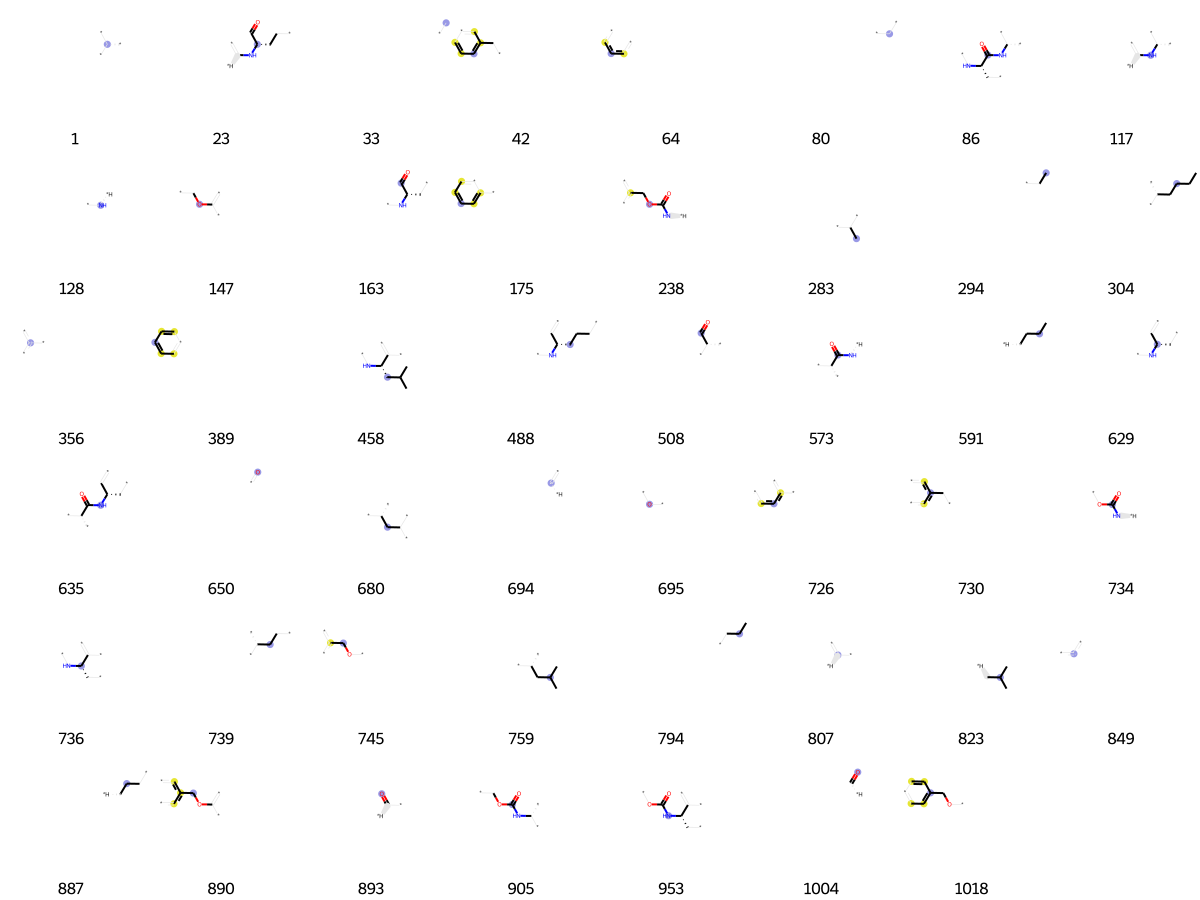

In [2520]:
prints = [(M41, x, bi) for x in fp41.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp41.GetOnBits ()])

In [2521]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[19,
 64,
 74,
 90,
 136,
 257,
 281,
 300,
 308,
 356,
 378,
 437,
 511,
 562,
 579,
 595,
 694,
 726,
 736,
 781,
 842,
 849,
 856,
 922,
 954]

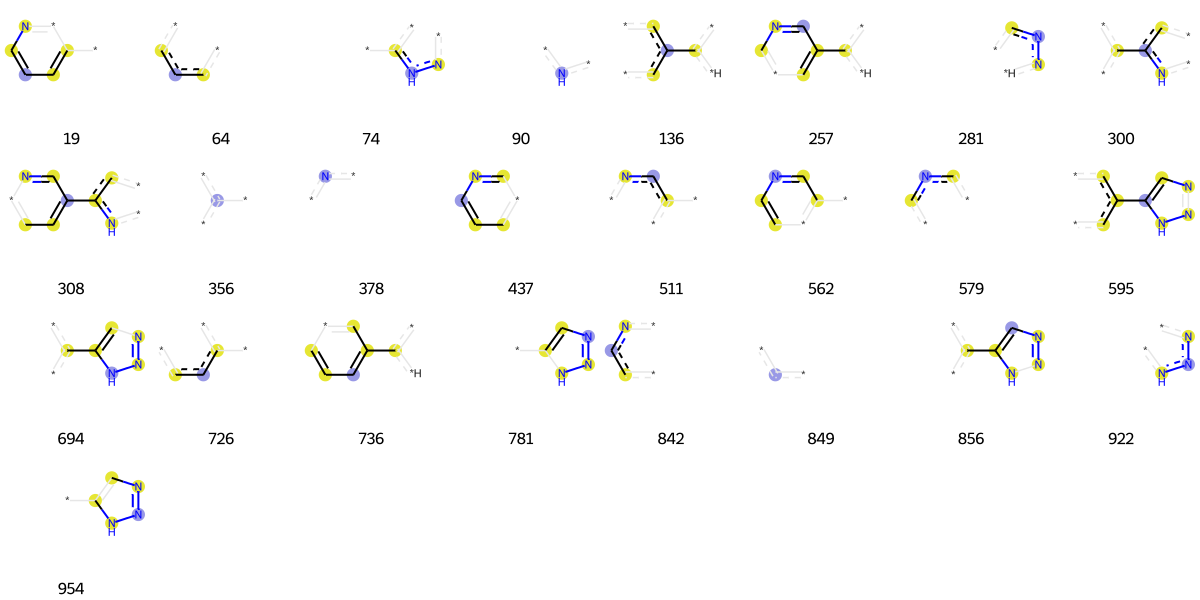

In [2522]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [2523]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[1,
 10,
 15,
 30,
 64,
 80,
 114,
 128,
 136,
 144,
 213,
 225,
 230,
 237,
 266,
 301,
 339,
 356,
 361,
 378,
 387,
 426,
 428,
 429,
 456,
 463,
 486,
 511,
 610,
 631,
 646,
 650,
 667,
 673,
 699,
 725,
 726,
 736,
 744,
 767,
 787,
 806,
 807,
 849,
 875,
 893,
 904,
 926,
 935,
 980,
 983,
 1019]

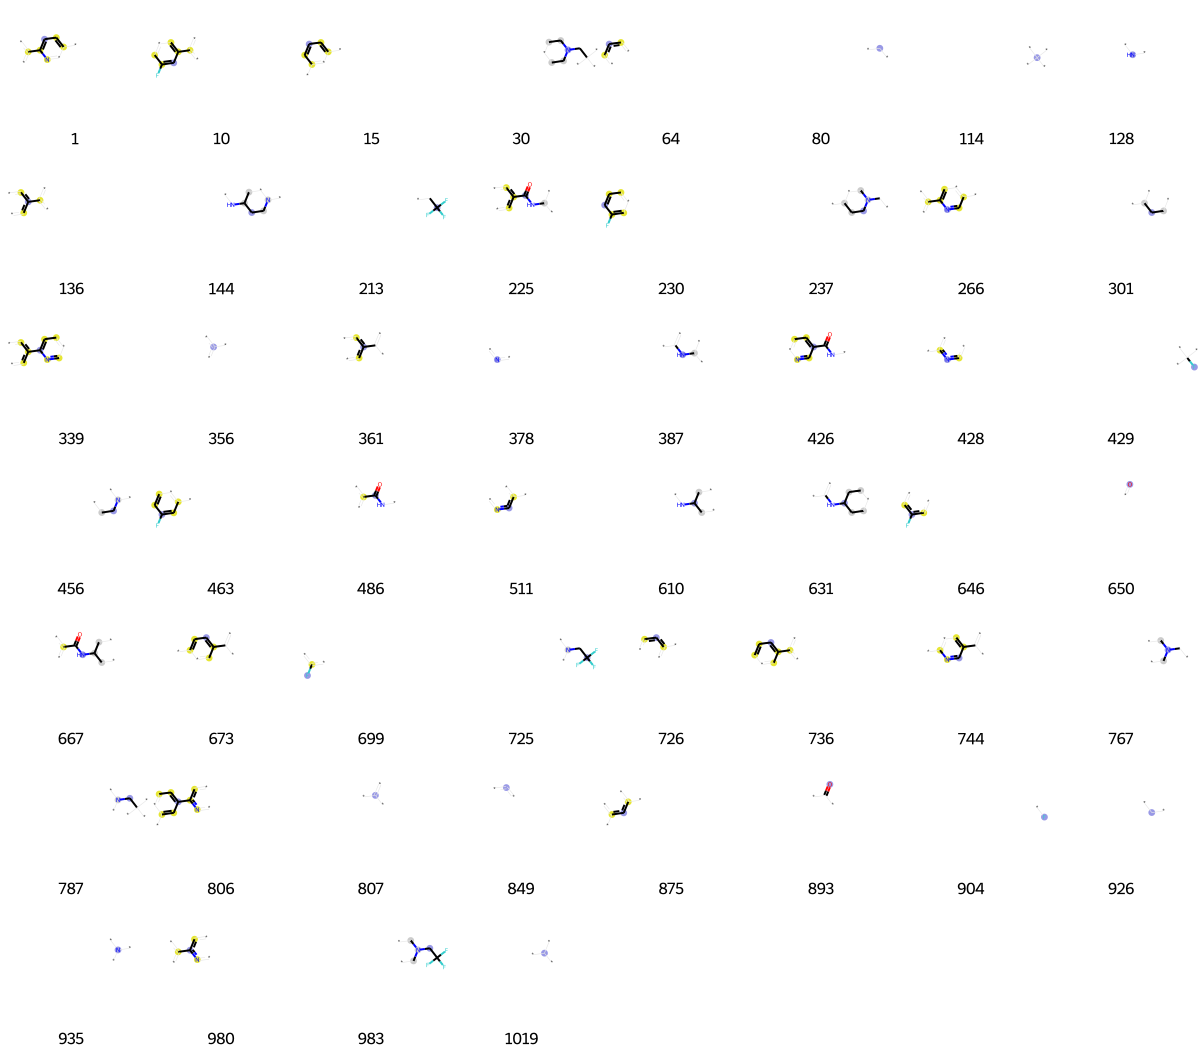

In [2524]:
prints = [(M43, x, bi) for x in fp43.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp43.GetOnBits ()])

In [2525]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[15,
 33,
 37,
 64,
 110,
 128,
 138,
 139,
 140,
 147,
 149,
 162,
 188,
 191,
 197,
 272,
 286,
 309,
 319,
 322,
 329,
 333,
 350,
 356,
 361,
 367,
 378,
 381,
 386,
 428,
 452,
 458,
 491,
 511,
 512,
 547,
 562,
 564,
 575,
 629,
 650,
 695,
 698,
 700,
 703,
 716,
 726,
 762,
 781,
 789,
 807,
 835,
 841,
 849,
 866,
 875,
 881,
 893,
 948,
 950,
 960,
 961,
 967,
 1003]

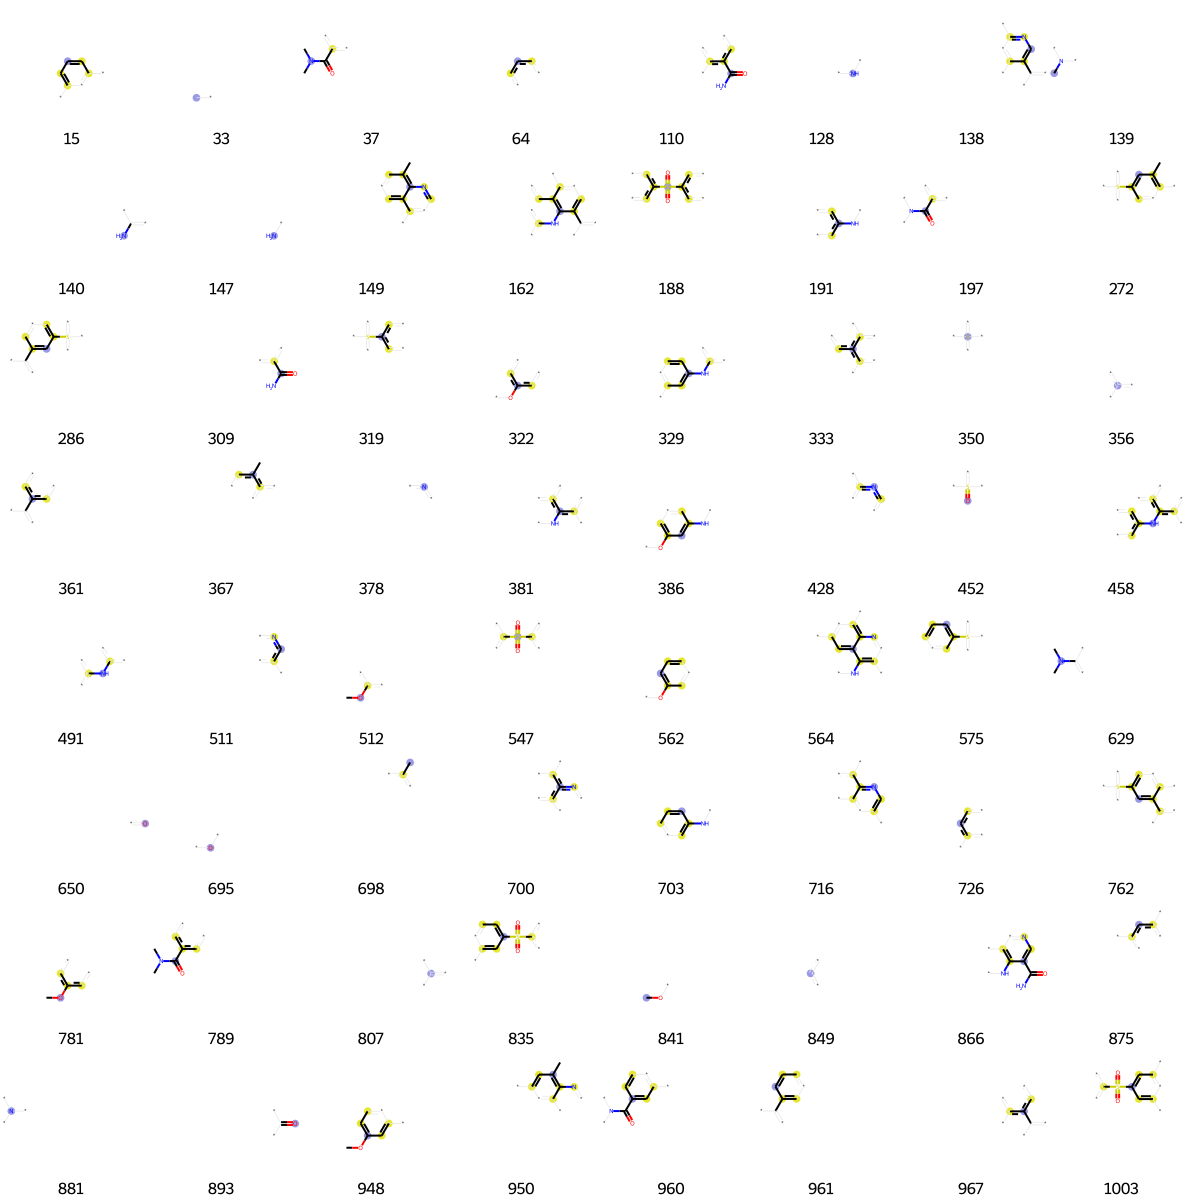

In [2526]:
prints = [(M44, x, bi) for x in fp44.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp44.GetOnBits ()])

In [2527]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[4,
 13,
 33,
 90,
 110,
 128,
 140,
 144,
 146,
 147,
 252,
 301,
 309,
 326,
 339,
 351,
 356,
 387,
 407,
 428,
 433,
 446,
 456,
 506,
 526,
 556,
 578,
 610,
 626,
 646,
 650,
 669,
 674,
 680,
 692,
 698,
 699,
 721,
 734,
 736,
 739,
 801,
 807,
 816,
 825,
 849,
 852,
 856,
 875,
 888,
 893,
 904,
 926,
 935,
 950,
 960,
 967,
 1019]

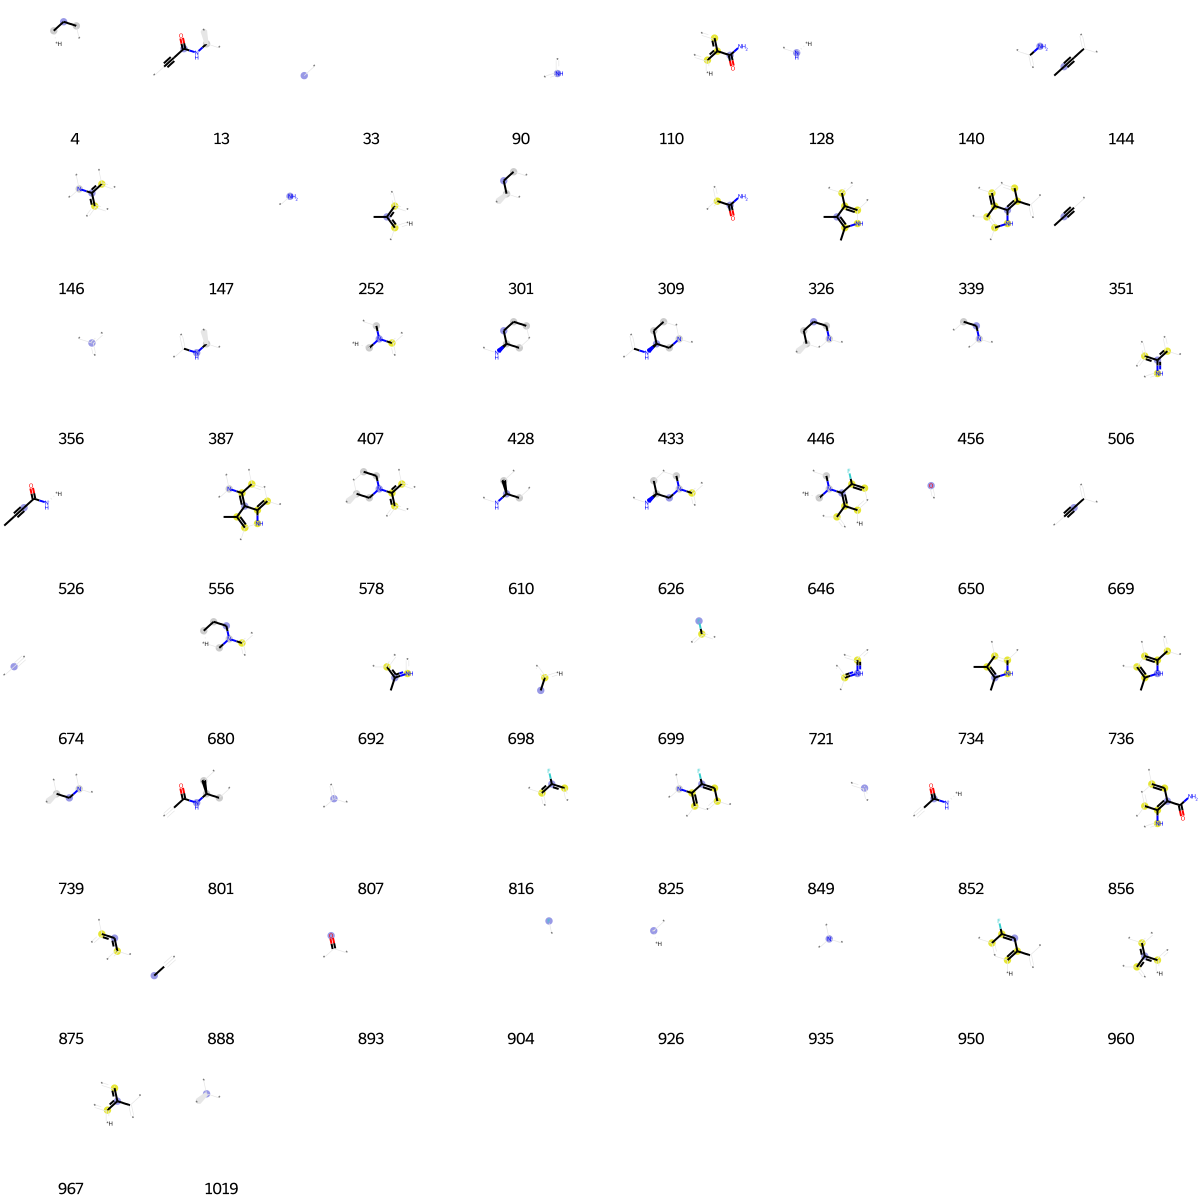

In [2528]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [2529]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[29,
 33,
 80,
 83,
 90,
 128,
 146,
 204,
 214,
 237,
 276,
 277,
 288,
 301,
 314,
 320,
 322,
 354,
 356,
 360,
 361,
 378,
 437,
 452,
 456,
 507,
 512,
 517,
 523,
 609,
 619,
 647,
 650,
 656,
 673,
 695,
 714,
 718,
 721,
 726,
 739,
 746,
 750,
 752,
 755,
 756,
 767,
 781,
 807,
 813,
 831,
 834,
 841,
 849,
 881,
 890,
 893,
 924,
 926,
 929,
 935,
 950,
 974,
 978,
 1019]

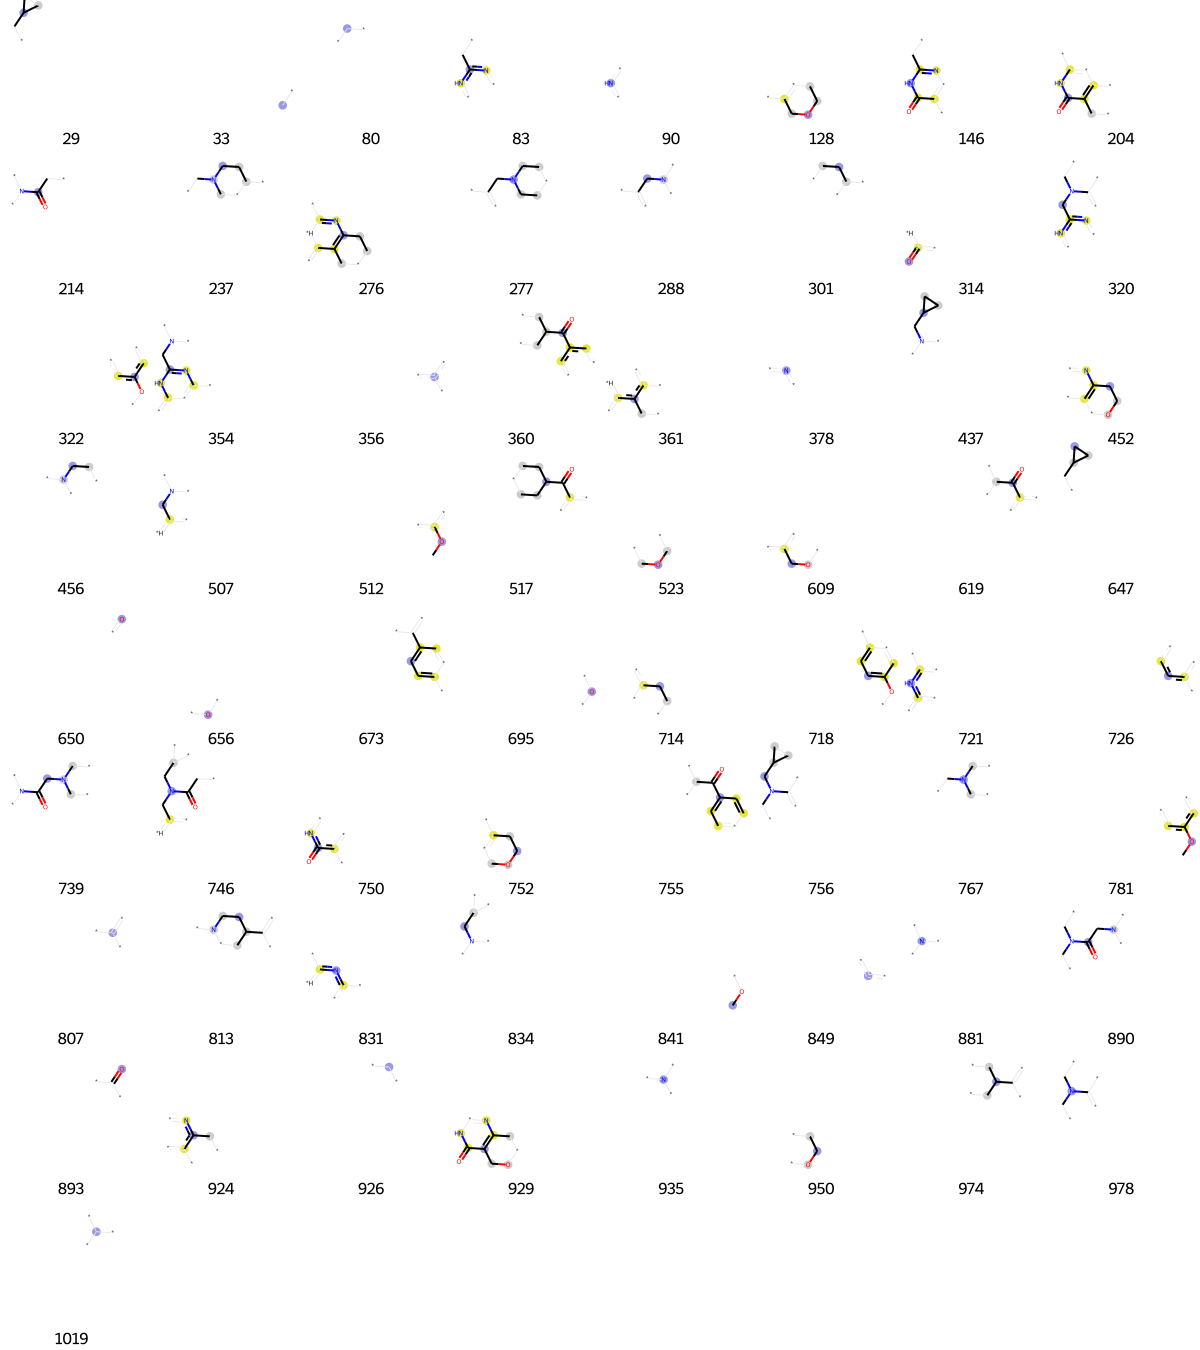

In [2530]:
prints = [(M46, x, bi) for x in fp46.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp46.GetOnBits ()])

In [2531]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[4,
 110,
 112,
 130,
 138,
 147,
 151,
 182,
 205,
 213,
 310,
 333,
 356,
 358,
 360,
 378,
 407,
 433,
 435,
 448,
 456,
 527,
 569,
 674,
 680,
 790,
 831,
 833,
 849,
 856,
 875,
 926,
 935,
 937,
 960,
 974]

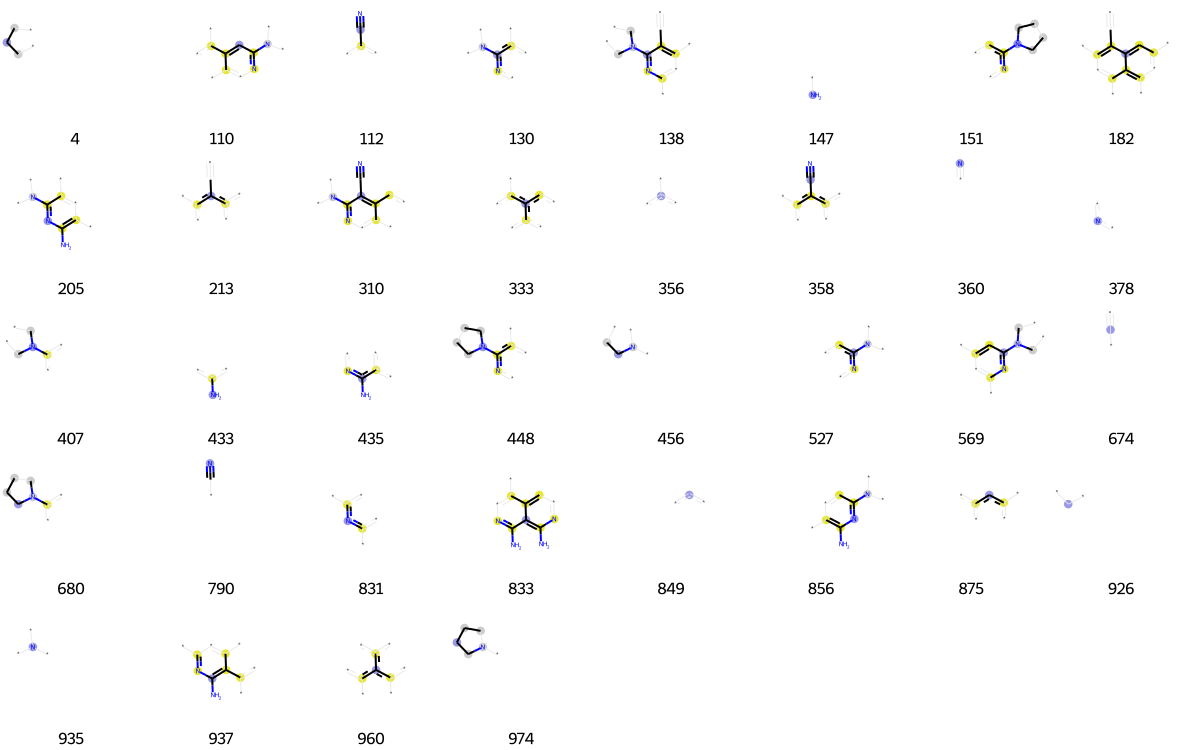

In [2532]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [2533]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[9,
 15,
 64,
 80,
 140,
 147,
 161,
 175,
 275,
 277,
 325,
 356,
 361,
 389,
 406,
 423,
 433,
 573,
 650,
 654,
 726,
 751,
 767,
 791,
 807,
 849,
 874,
 893,
 961,
 967]

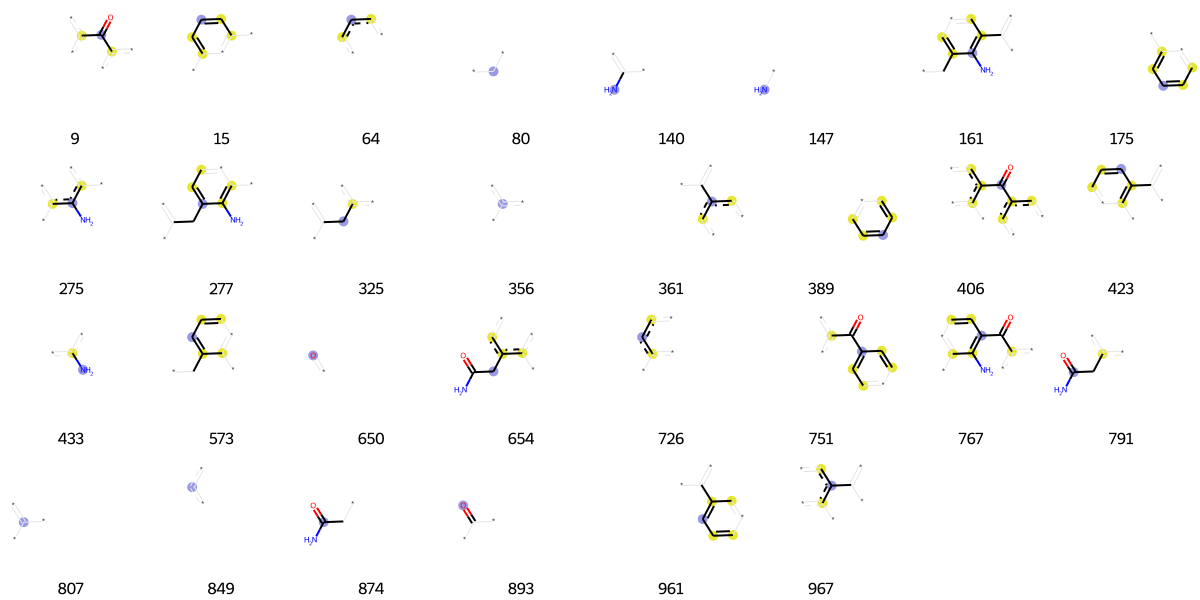

In [2534]:
prints = [(M48, x, bi) for x in fp48.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp48.GetOnBits ()])

In [2535]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[2,
 4,
 5,
 15,
 33,
 64,
 80,
 114,
 116,
 128,
 162,
 175,
 184,
 191,
 225,
 265,
 270,
 271,
 285,
 288,
 298,
 301,
 314,
 356,
 361,
 387,
 389,
 392,
 410,
 435,
 456,
 458,
 479,
 485,
 588,
 623,
 650,
 662,
 684,
 694,
 703,
 716,
 726,
 739,
 792,
 802,
 807,
 823,
 849,
 875,
 886,
 890,
 893,
 926,
 935,
 961,
 965,
 966,
 969,
 976,
 1019]

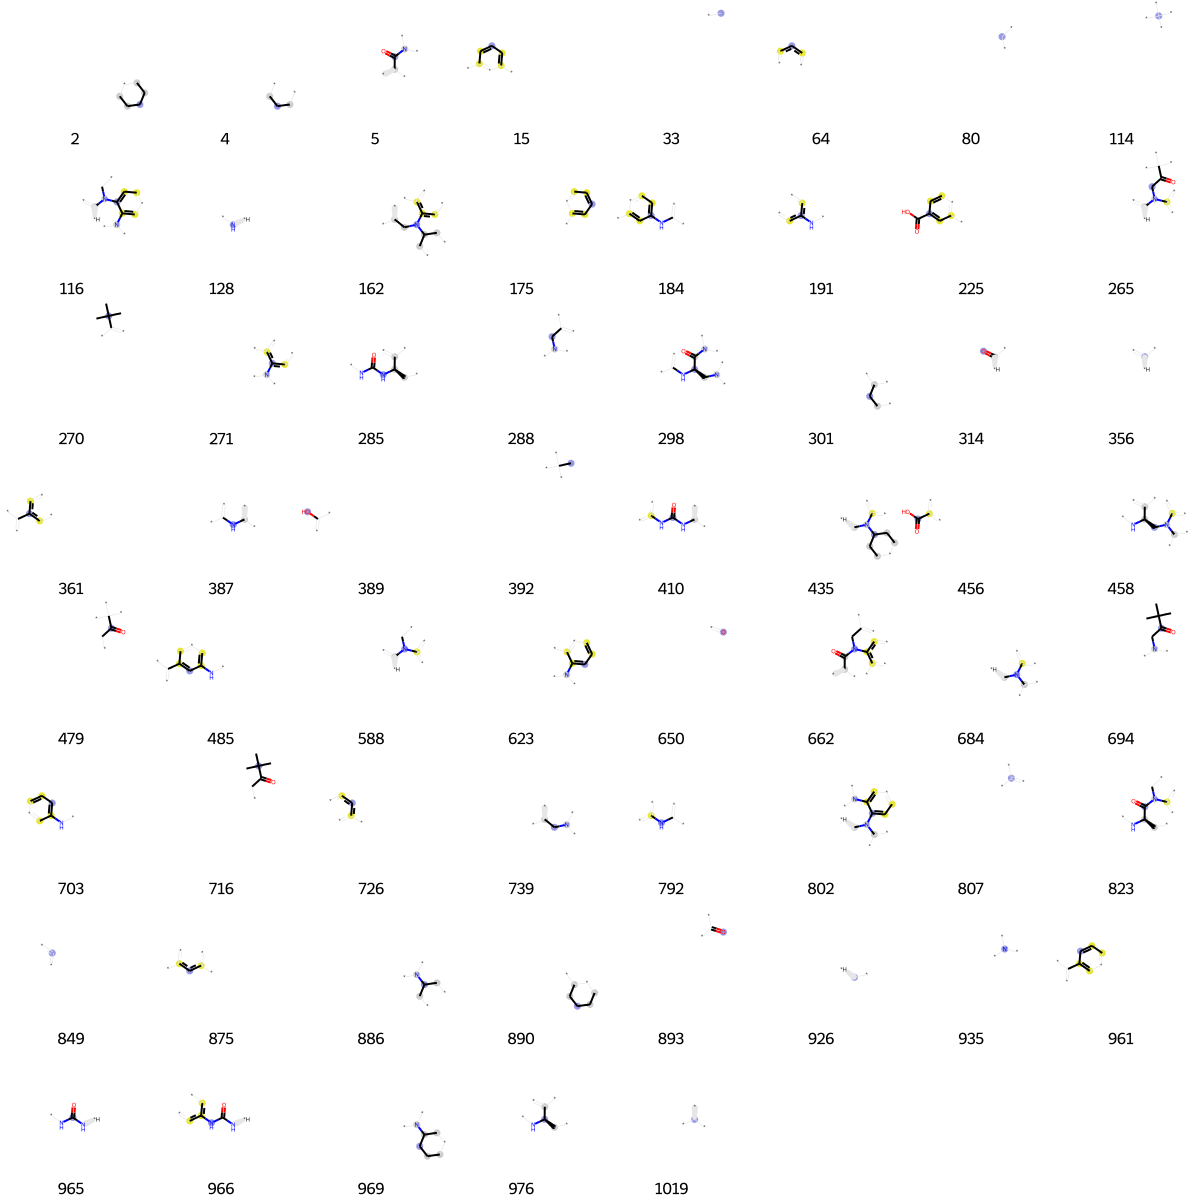

In [2536]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [2537]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[1,
 15,
 26,
 33,
 46,
 64,
 66,
 80,
 127,
 128,
 136,
 159,
 169,
 184,
 191,
 214,
 222,
 294,
 322,
 356,
 357,
 360,
 366,
 373,
 378,
 386,
 404,
 417,
 432,
 479,
 516,
 530,
 538,
 561,
 562,
 614,
 640,
 642,
 650,
 659,
 664,
 666,
 674,
 695,
 703,
 723,
 725,
 726,
 735,
 739,
 742,
 743,
 744,
 790,
 792,
 807,
 809,
 829,
 835,
 849,
 875,
 881,
 893,
 896,
 898,
 904,
 926,
 927,
 929,
 932,
 935,
 1019]

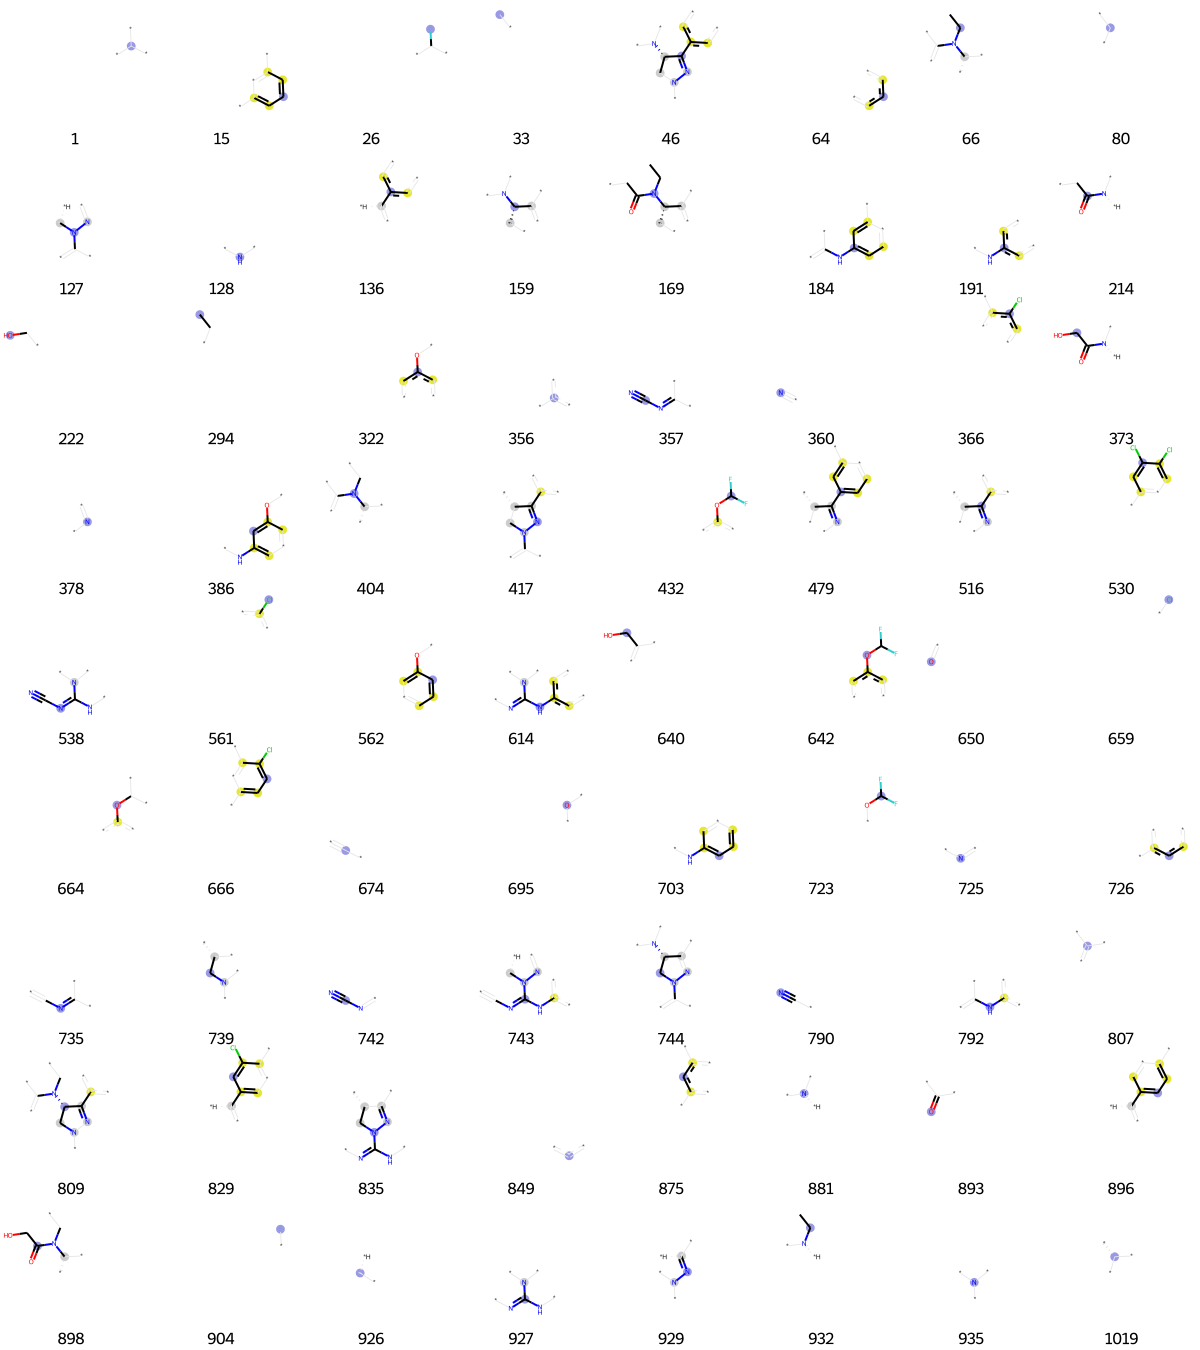

In [2538]:
prints = [(M50, x, bi) for x in fp50.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp50.GetOnBits ()])